## **3. K-Means Clustering**

K-means clustering works by classifying a dataset through a defined number of clusters that is fixed a priori.

Here is a walkthrough of the k-means algorithm:
1. We start by selecting k centroids where k is the number of clusters.
2. We then place the k centroids in our training data at different random places.
3. We then calculate the distance from each point in the training data to each centroid.
4. The points are then grouped based on the nearest centroid.
5. The grouped points are isolated together with their respective centroid. Find the mean of each group, then move the centroid to the location of the mean we have calculated.
6. We repeat the steps until we reach an optimal number of k groups.

**Fig 2: A K-means clustering procedure flow chart**

<center><img src='https://www.researchgate.net/profile/Alhadi-Bustamam/publication/318341309/figure/fig1/AS:514967923159041@1499789328422/Flowchart-of-k-means-clustering-algorithm.png'></center>

##### Source: [Bustamam, A. et al. "Application of K-means Clustering Algorithm in Grouping the DNA Sequences of Hepatitis B Virus (HBV)." *AIP Conference Proceedings*, vol. 1862. no. 1. AIP Publishing LLC, 2017.](https://aip.scitation.org/doi/abs/10.1063/1.4991238)

Mathematically, the objective of the K-means algorithm is to minimize an objective function which in our case is a squared error function given by 
$$J=\sum_{j=1}^k \sum_{i=1}^n ||x_i^{j} - C_j||^2$$
where 

$$||x_i^{j} - C_j||^2$$
is the Euclidean distance between data points $x_i$ and the centroid $C_j$.

Below is the mathematical walkthrough of the algorithm:
1. Let $X = \{x_1, x_2, \cdots, x_n\}$ be our data points and $V = \{v_1, v_2, \cdots, v_c\}$ be the centroids.
2. Select centroids randomly.
3. Then, calculate the distance between the centroids and each data point.
4. We then assign the data points to the centroids closest to them.
5. We recalculate the new centroids by computing the mean of the grouping,
$$v_i = \left(\frac{1}{c_i}\right)\sum_{j=1}^{c_i} x_j$$
where $c_i$ is the number of data points in the ith cluster.
6. Find the distance between the new centroid and each data point.
7. If there is no change in the composition of the clusters then we stop, or else we repeat the procedure from step 3.

The issue with the K-means algorithm is that the number of clusters need to be selected before we begin modeling. We can guess the number of clusters using either the Silhoutte score or the elbow method.



### **3.2 Elbow Method**

We can construct an elbow plot to find the appropriate value of $k$ to use in our clustering.

We find the optimal number of clusters (groups) by drawing a line plot of **Within the Sum of Squares (WSS)** versus the number of clusters. We define WSS as the sum of square difference between each point in a cluster and its cluster center. An elbow plot is shown in the figure below:

**Fig 4: An Elbow Plot Showing the Number of Optimal Clusters**

<center><img src = 'https://editor.analyticsvidhya.com/uploads/43191elbow_img%20(1).png'></center>

##### Source: [Tripathi, Shreya et al. "Approaches to Clustering in Customer Segmentation." International Journal of Engineering & Technology, 2012, vol. 7, no. 3.12, 2018, pp. 802-807.](https://www.sciencepubco.com/index.php/ijet/article/view/16505)

Note that in the K-means algorithm, we do not have a general method for getting a unique optimal number of clusters.

We now put K-means into action with a simple example.

X.shape: (2500, 2)
[[ 1.47496035  5.35175948]
 [ 0.529098    7.94350659]
 [-1.94190568  2.06475364]
 ...
 [-1.99748373  3.10485287]
 [-1.80260091  6.66662969]
 [ 1.99160603 -0.68226687]]
y.shape: (2500,)
[0 3 2 ... 2 3 1]


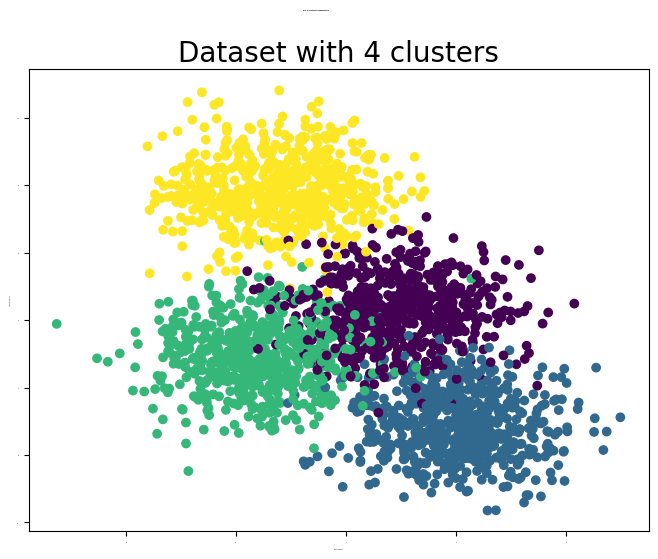

In [30]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

np.random.seed(0)

%matplotlib inline

# 4 clusters, 2500 data points
X, y = make_blobs(centers=4, n_samples=2500)

print("X.shape:", X.shape)
print(X)
print("y.shape:", y.shape)
print(y)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset with 4 clusters", fontsize=20)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.suptitle(
    "Fig. 5: Dataset Visualization", fontweight="bold", horizontalalignment="right"
)
plt.show()

wcss:
[26427.734246676442, 12322.048505891715, 7126.696551029284, 4413.013338777264, 3930.388594560818, 3500.1867366918755, 3077.356997439937, 2739.7090203292496, 2452.843310446985, 2160.970872801721]


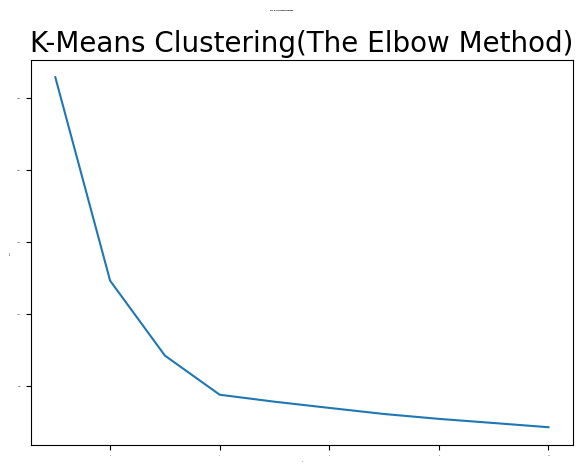

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print("wcss:")
print(wcss)

plt.rcParams["figure.figsize"] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title("K-Means Clustering(The Elbow Method)", fontsize=20)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.suptitle("Fig. 6: The Elbow Method", fontweight="bold", horizontalalignment="right")
plt.show()

Note that after the value of $k = 4$, the <u>WCSS decreases very slowly</u>. Therefore, our value of $k$ is equal to 4.

ymeans:
[2 0 3 ... 3 0 1]


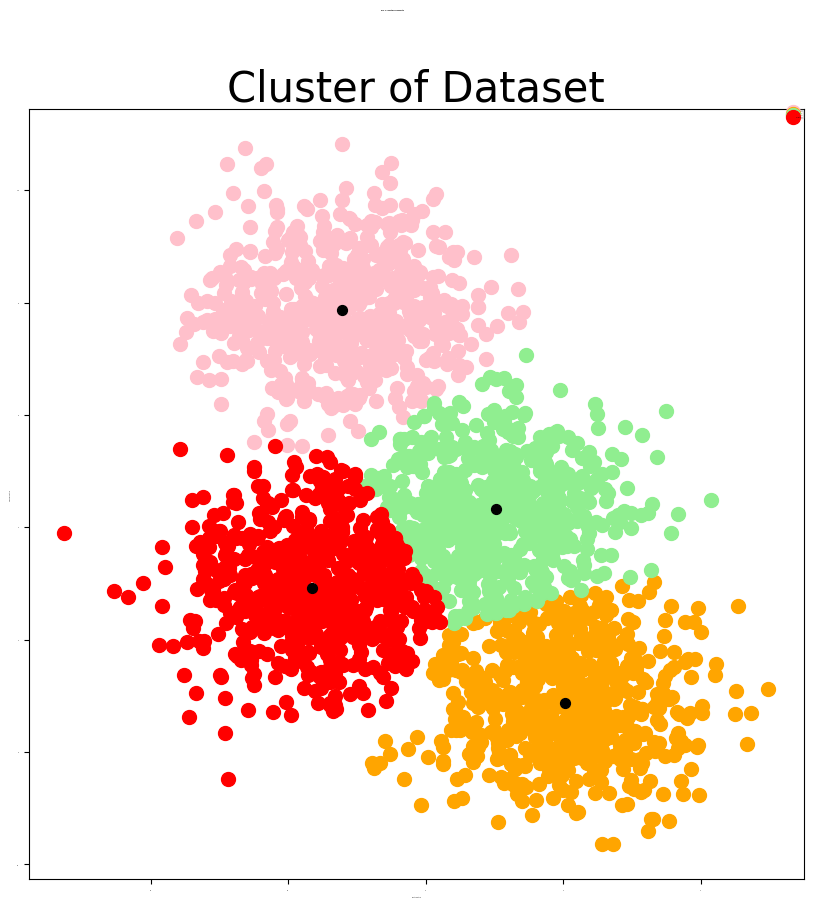

In [32]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
ymeans = kmeans.fit_predict(X)

print("ymeans:")
print(ymeans)

plt.rcParams["figure.figsize"] = (10, 10)
plt.title("Cluster of Dataset", fontsize=30)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s=100, c="pink", label="Cluster 0")
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s=100, c="orange", label="Cluster 1")
plt.scatter(
    X[ymeans == 2, 0], X[ymeans == 2, 1], s=100, c="lightgreen", label="Cluster 2"
)
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s=100, c="red", label="Cluster 3")
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c="black"
)

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend()
# `plt.suptitle`('Fig 10: Clustering Results', fontsize=20, y = 1, ha = 'right')
plt.suptitle(
    "Fig. 7: Clustering Results", fontweight="bold", horizontalalignment="right"
)
plt.show()

### **3.3 k-Means Algorithm: Expectation–Maximization**

The Expectation-Maximization (E-M) procedure is as follows.
1. Randomly select the cluster centers.
2. Repeat the following steps until convergence is reached:
- E-Step: Points are assigned to the nearest cluster center.
- M-Step: Find the mean of each cluster and replace the cluster center with the mean.

We can visualize the E-M algorithm in action below.


C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\1454777161.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=c, cmap="viridis", s=50 * factor, alpha=0.3)


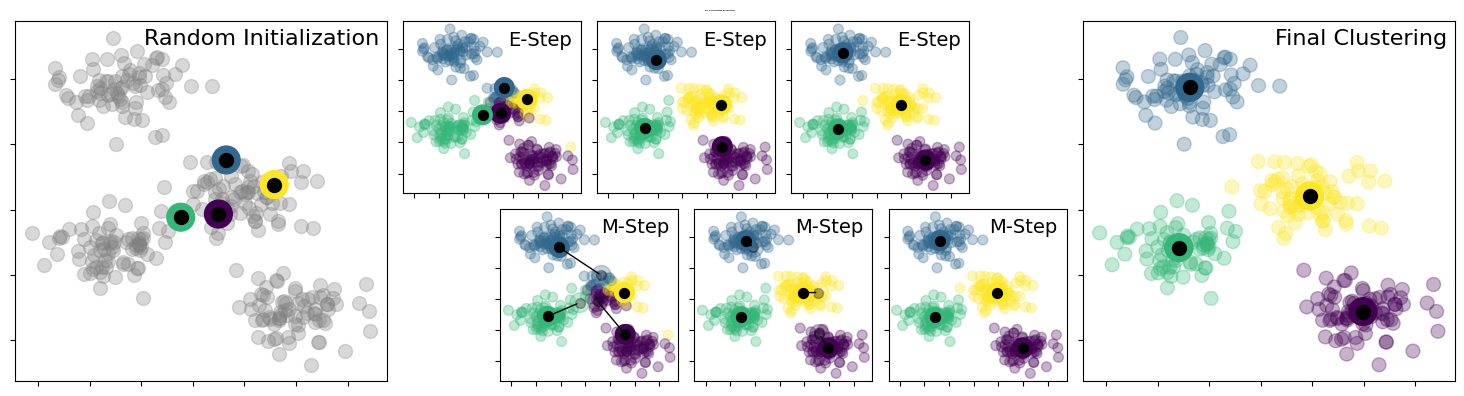

In [33]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap="viridis", s=50 * factor, alpha=0.3)


def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        c=np.arange(4),
        cmap="viridis",
        s=200 * factor,
        alpha=alpha,
    )
    ax.scatter(centers[:, 0], centers[:, 1], c="black", s=50 * factor, alpha=alpha)


def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax


fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(
    4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2
)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(
    0.98,
    0.98,
    "Random Initialization",
    transform=ax0.transAxes,
    ha="right",
    va="top",
    size=16,
)
draw_points(ax0, "gray", factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i : 6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i : 7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate(
            "",
            new_centers[i],
            centers[i],
            arrowprops=dict(arrowstyle="->", linewidth=1),
        )

    # Finish iteration
    centers = new_centers
    ax1.text(
        0.95, 0.95, "E-Step", transform=ax1.transAxes, ha="right", va="top", size=14
    )
    ax2.text(
        0.95, 0.95, "M-Step", transform=ax2.transAxes, ha="right", va="top", size=14
    )


# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(
    0.98,
    0.98,
    "Final Clustering",
    transform=axf.transAxes,
    ha="right",
    va="top",
    size=16,
)
plt.suptitle(
    "Fig. 8: Expectation-Maximization", fontweight="bold", horizontalalignment="right"
)
plt.show()

The limitations of the E-M algorithm are:
- We may not achieve a globally optimal solution.
- We must choose the number of clusters before modeling.
- K-means will be slow for big data.
- K-means only works with linear cluster boundaries.

## **5. Hierarchical Clustering**

In hierarchical clustering we define a distance matrix using linkage with the following parameters
- Method: To calculate the distance between clusters.
- Metric: The distance metric to be used.
- Optimal ordering: To order data points.

The different types of methods we use in hierarchical clustering are:

1. Single: Finds the distance between the closest points in different clusters.
2. Complete: Finds the distance between the farthest points in different clusters.
3. Average: Finds the distance between the arithmetic mean of our clusters.
4. Centroids: Finds the distance between the geometric mean of our clusters.
5. Median: Finds the distance between the median of our clusters.
6. Ward: Finds distance based on our sum of squares.

Below are Python scripts on how to implement the different methods.

### **5.1 Ward Method**

In [34]:
import pandas as pd
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(
    n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9
)
df = pd.DataFrame(X1, columns=["X", "y"])
df.head()

,X,y
0,4.308231,3.072610
1,-0.988157,0.647226
2,2.868223,4.244352
3,0.919636,0.750873
4,-2.316760,0.459374


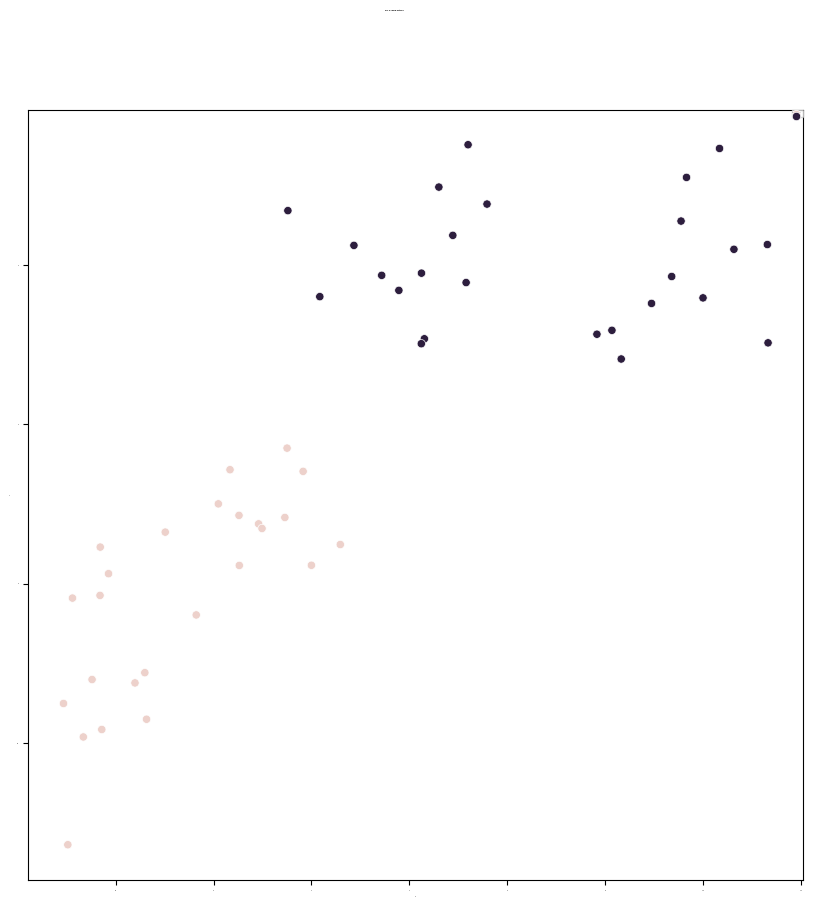

In [35]:
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage()
distance_matrix = linkage(df[["X", "y"]], method="ward", metric="euclidean")

# Assign cluster labels
df["cluster_labels"] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x="X", y="y", hue="cluster_labels", data=df)
plt.suptitle("Fig. 9: Ward Method", fontweight="bold", horizontalalignment="right")
plt.show();

### **5.2 Single Method**

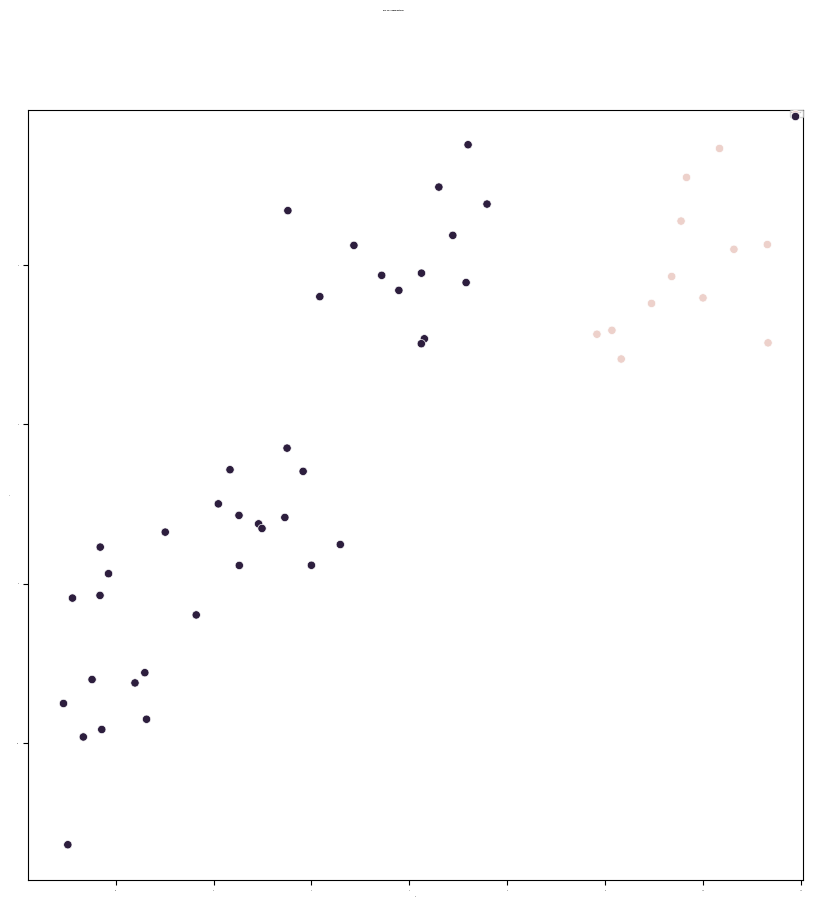

In [36]:
# Use the linkage()
distance_matrix = linkage(df[["X", "y"]], method="single", metric="euclidean")

# Assign cluster labels
df["cluster_labels_2"] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x="X", y="y", hue="cluster_labels_2", data=df)
plt.suptitle("Fig. 10: Single Method", fontweight="bold", horizontalalignment="right")
plt.show();

### **5.3 Complete Method**

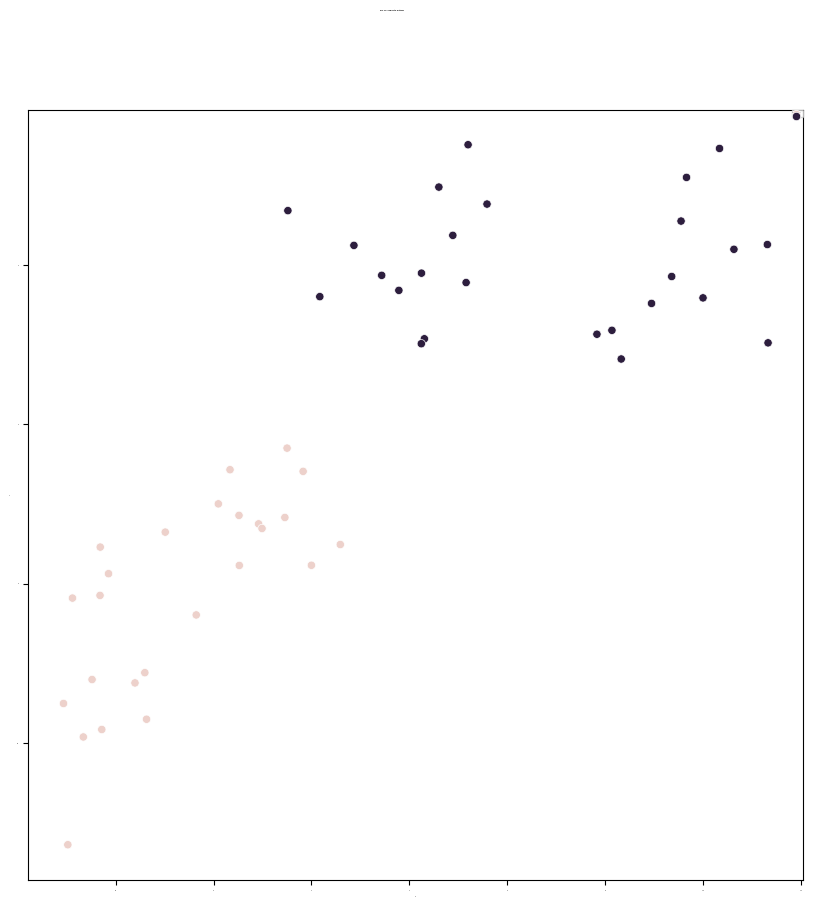

In [37]:
# Use the linkage()
distance_matrix = linkage(df[["X", "y"]], method="complete", metric="euclidean")

# Assign cluster labels
df["cluster_labels_3"] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x="X", y="y", hue="cluster_labels", data=df)
plt.suptitle("Fig. 11: Complete Method", fontweight="bold", horizontalalignment="right")
plt.show();

### **5.4 Dendrogram**

Dendrograms help us visualize how clusters are formed, and from them, we can choose the number of clusters in our dataset. Below is simple code that gives us a dendrogram diagram.

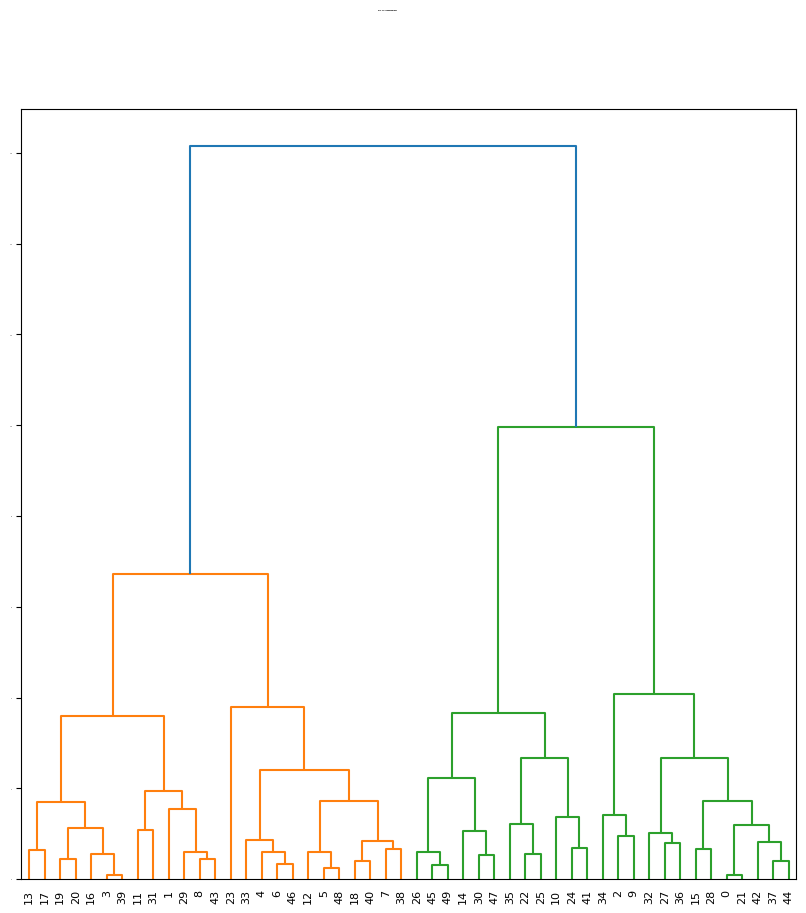

In [38]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)
plt.suptitle("Fig. 11: Dendrogram", fontweight="bold", horizontalalignment="right")
plt.show()

In summary, the following are steps taken by hierarchical clustering:
1. We treat each point in our dataset as its own cluster.
2. We then calculate the Euclidean distance between the centroids of all clusters in our dataset.
3. We join the closest clusters together.
4. We repeat steps 2 and 3 until we get only one cluster that contains all the data points.
5. A dendogram that shows the evolution of the hierarchical structure is plotted showing how clusters are arranged from top to bottom.
6. It is now up to us to decide at which level we want to create our clusters.

## **6. Gaussian Mixture Models (GMM)**

This is a model-based approach that uses several models to generate clusters and attempts to optimize the model fit on the data.

The advantages of this type of clustering includes that the possibility of one point belonging to several clusters, a density approximation for each cluster, the availability of robust statistical inference methods to do our clustering, and the freedom to choose the component distribution of the model.

The K component distributions that make up a mixture model are collectively combined to give $$f(x) = \sum_{k= 1}^K a_k f_k(x)$$
where $a_k$ is the $k$-th component contribution in building $f(x)$.

Like the K-means algorithm above, GMM is also used to find the number of clusters in a dataset. Consider the example below.



In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some data
from sklearn.datasets import make_blobs

sns.set()

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # flip axes for better plotting

To visualize the number of clusters, we fit our Gaussian mixture model with a pre-specified number of clusters.

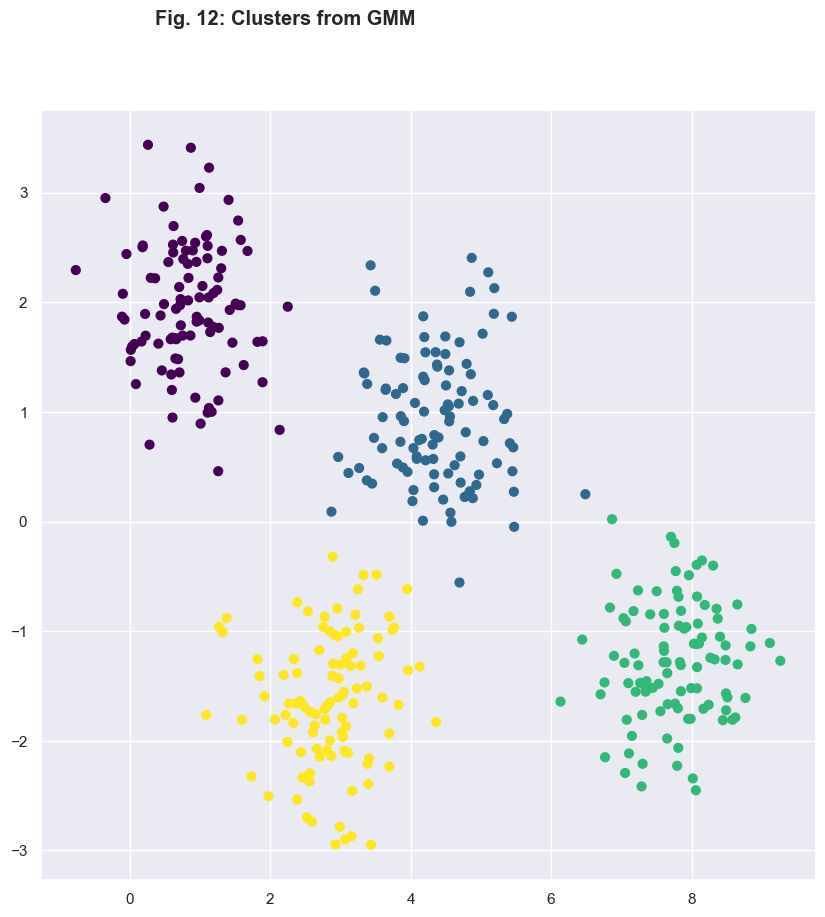

In [40]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis")
plt.suptitle(
    "Fig. 12: Clusters from GMM", fontweight="bold", horizontalalignment="right"
)
plt.show();

The Gaussian mixture model contains a probabilistic model that gives the probability of a point belonging to a cluster.

In [41]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.537 0.463 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]]


The Gaussian mixture model like the k-means algorithm uses the expectation-maximization approach below.
1. We choose a random starting point.
2. Repeat the following until convergence.
- E-Step: Find the weight of each point belonging to a given cluster.
- M-Step: Update the location and shape of each cluster based on the data point weights.

GMM will at times miss the globally optimal solution, and it is therefore recommended to use different random initialization.

### **6.1 Number of Clusters**

GMM being a generative model will provide us with a natural technique of finding the optimal number of clusters. Since a generative model provides probability distribution for a given dataset, we can use analytic criterion techniques like *Akaike Information Criterion (AIC)* or *Bayesian Information Criterion (BIC)* to reduce the chances of our model overfitting. We can also use cross-validation to achieve the same.

In the example below, we use AIC and BIC.

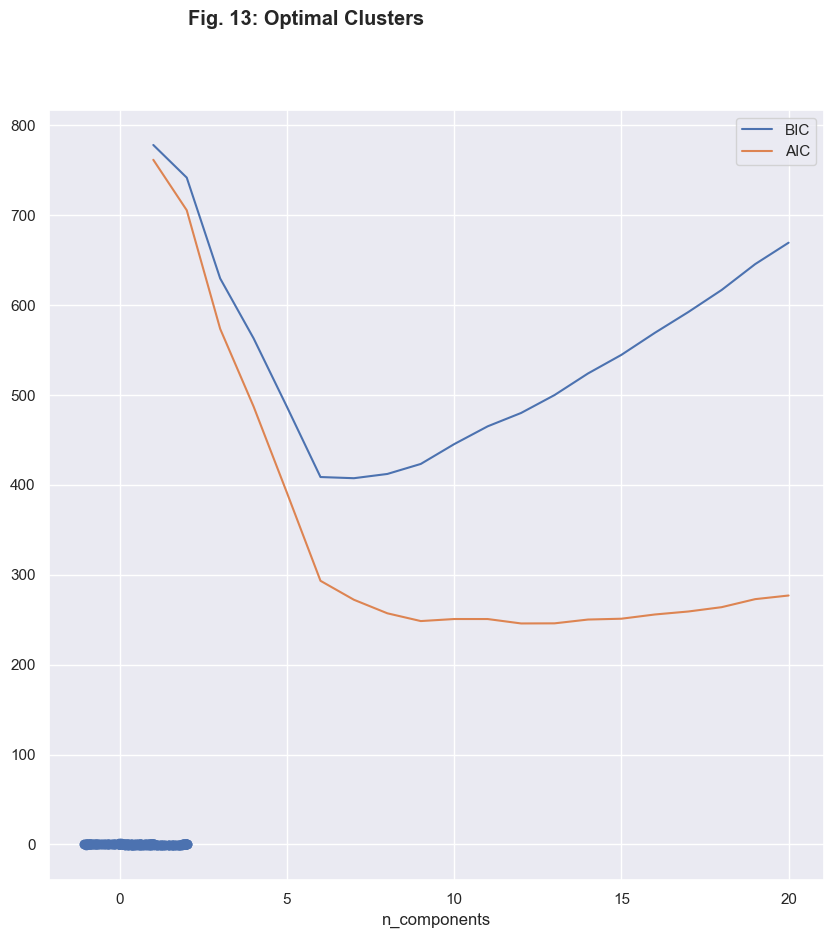

In [42]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

n_components = np.arange(1, 21)
models = [
    mixture.GaussianMixture(n, covariance_type="full", random_state=0).fit(Xmoon)
    for n in n_components
]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")
plt.suptitle(
    "Fig. 13: Optimal Clusters", fontweight="bold", horizontalalignment="right"
);

## **7. DBSCAN**

DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise. It works by identifying regions that are densely populated from sparsely populated regions. The logic follows that points belonging to a cluster should be close to the points in the same cluster.

It is defined by two parameters:
1. **Epsilon** that finds the radius, which has enough points within.
2. **Minimum Samples** that finds the minimum number of points we want to be in a cluster.

Below is an implementation of the DBSCAN algorithm.

labels:
[0 0 1 ... 0 1 2]
core_samples_mask:
[ True  True  True ...  True  True  True]
n_clusters_:
3
unique_labels:
{0, 1, 2}
colors:
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.99807766 0.99923106 0.74602076 1.        ]
 [0.36862745 0.30980392 0.63529412 1.        ]]


C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\2171932707.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)
C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\2171932707.py:64: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)


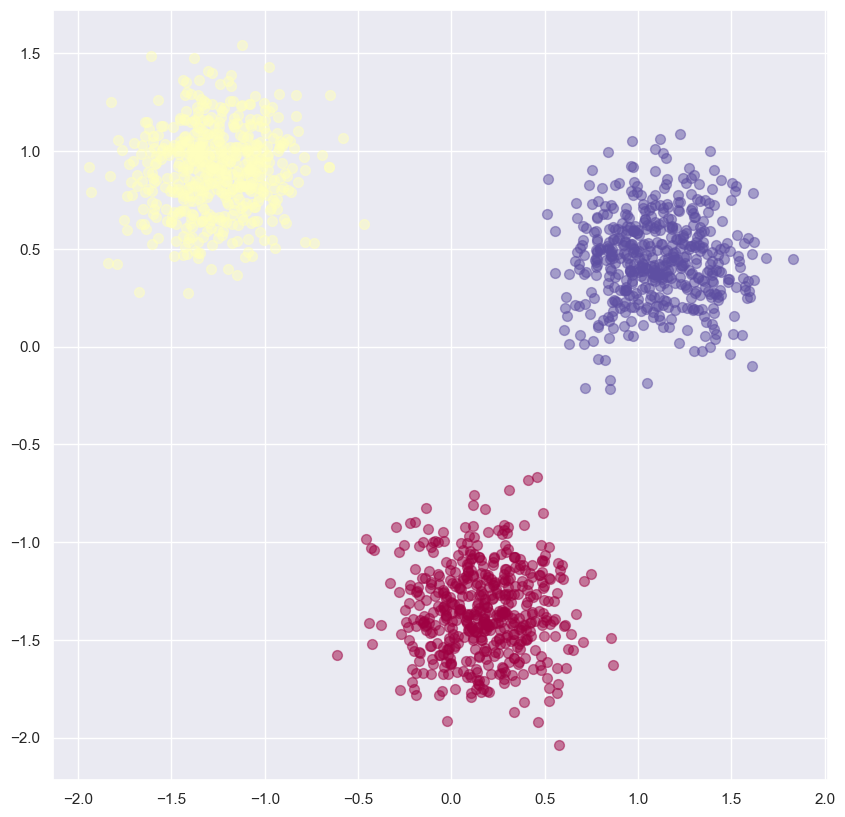

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline

def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(
        n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation
    )

    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = createDataPoints([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)

epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
print("labels:")
print(labels)

# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print("core_samples_mask:")
print(core_samples_mask)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("n_clusters_:")
print(n_clusters_)


# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
print("unique_labels:")
print(unique_labels)

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
print("colors:")
print(colors)

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = "k"

    class_member_mask = labels == k

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)
plt.show()

# Lesson 2

## **2. Agglomerative Hierarchical Clustering**

Agglomerative hierarchical clustering is the most widely used (in the hierarchical family) to cluster data points based on their similarity. It uses a **bottom-up** approach where each data point starts as an individual cluster, and at each iteration, similar clusters are merged as we move up the hierarchy until we obtain one cluster or we identify K clusters.

### **2.1 Algorithm**

1. Assume we have the dataset scattered in a two dimensional plane.

2. Each data point forms its own cluster at the beginning.


3. Similar clusters are merged.


4. Repeat step 2 above until a single cluster or K clusters remain(s).


<u>Two clusters are considered similar if the distance between them is small.</u>


### **2.3 Linkage Criterion**
 
Once we have settled on a distance metric to apply, we need to decide where the distance will be computed. This is referred to as **linkage**.

The commonly used linkage methods are:

 **1. Single linkage / nearest linkage:**

This is the minimum distance between a pair of data points in two different clusters given by

$d(u,v) = \min(dist(u[i], v[j]))$

 for data points $i$ in cluster $u$ and data points $j$ in cluster $v$. Consider the example below

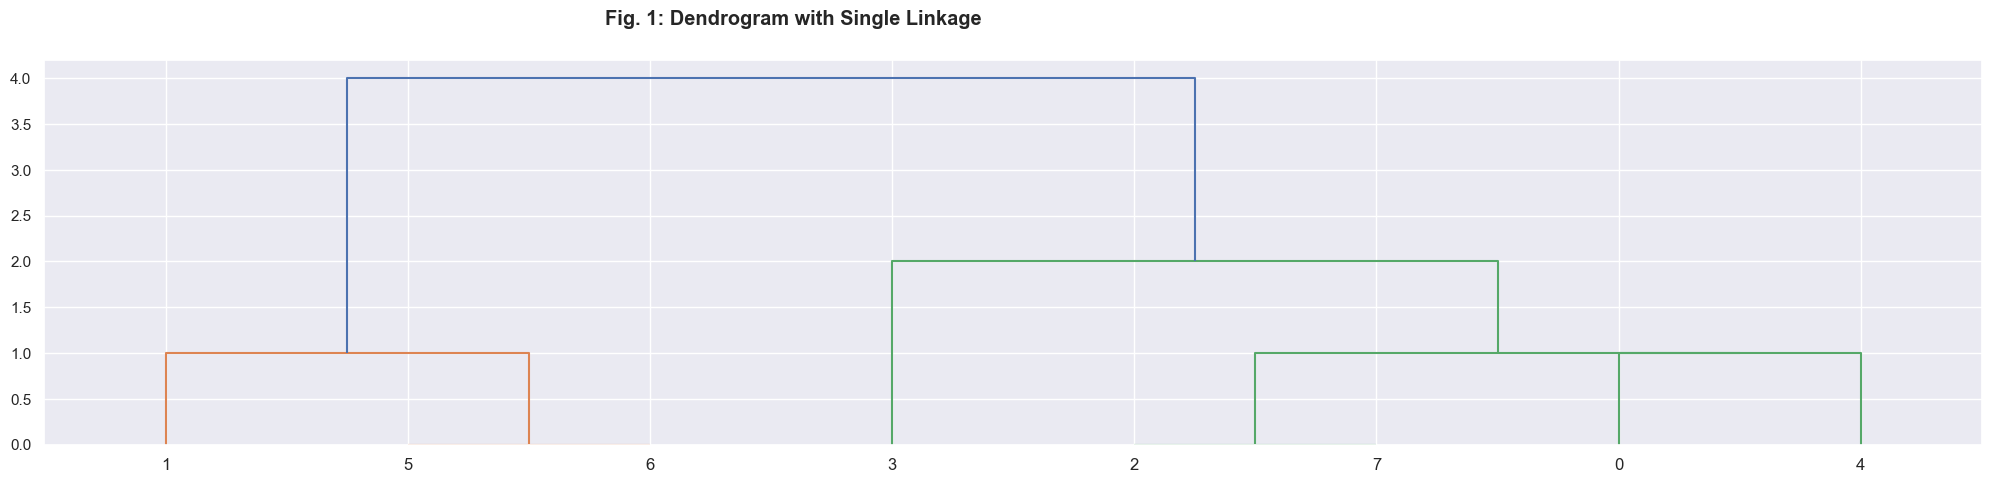

In [44]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

Z = linkage(X, "single")
fig = plt.figure(figsize=(25, 5))
plt.suptitle(
    "Fig. 1: Dendrogram with Single Linkage",
    fontweight="bold",
    horizontalalignment="right",
)
dn = dendrogram(Z)

**2. Complete Linkage:**

This is the maximum distance we can get between data points in two different clusters. The mathematical representation for this is $$d(u,v) = \max(dist(u[i], v[j]))$$ for data points $i$ in cluster $u$ and data points $j$ in cluster $v$. We define the complete linkage in a code as shown below:

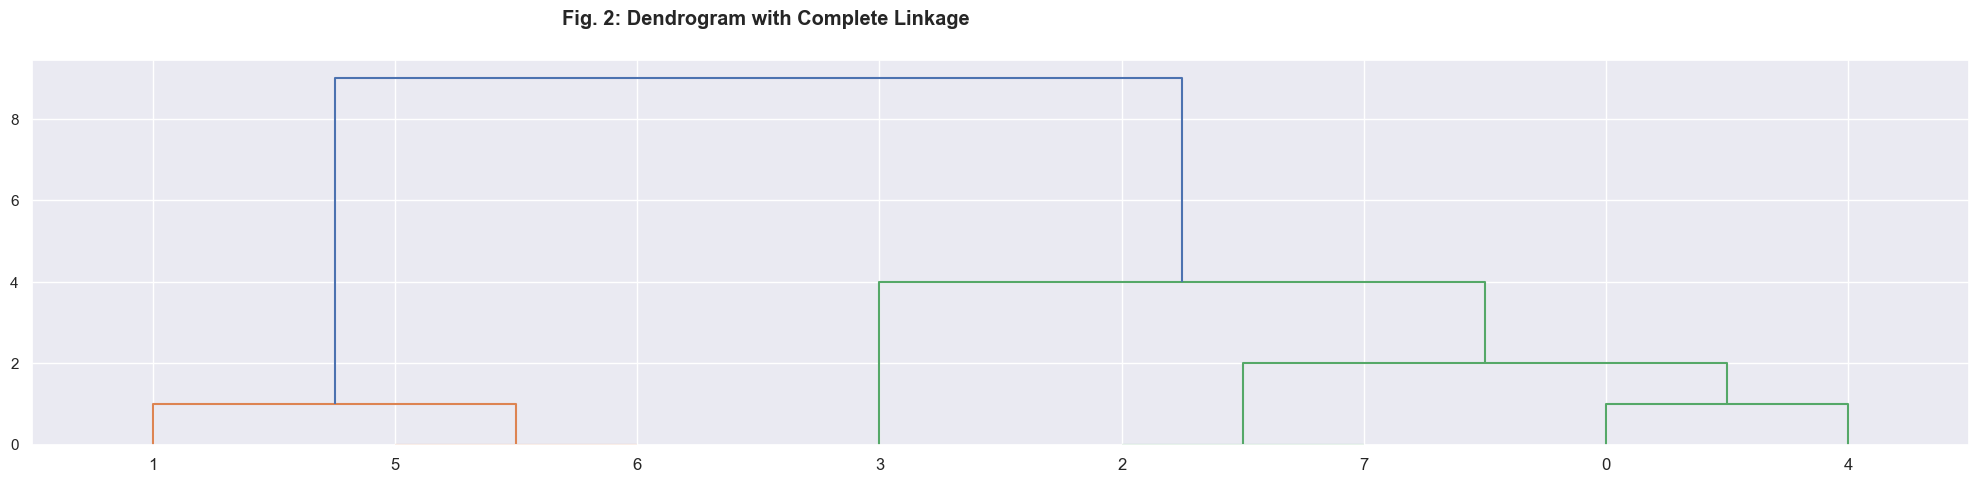

In [45]:
Z = linkage(X, "complete")
fig = plt.figure(figsize=(25, 5))
plt.suptitle(
    "Fig. 2: Dendrogram with Complete Linkage",
    fontweight="bold",
    horizontalalignment="right",
)
dn = dendrogram(Z)


**3. Average Linkage**: 

This is the average of the distance between each data point in one cluster to the data point in the next cluster. Its mathematical representation is as shown below
$$d(u,v) = \sum_{i,j}\frac{d(u[i],v[j])}{(|u|\times|v|)}$$

and just like the two linkages above we specify linkage as average in python code.



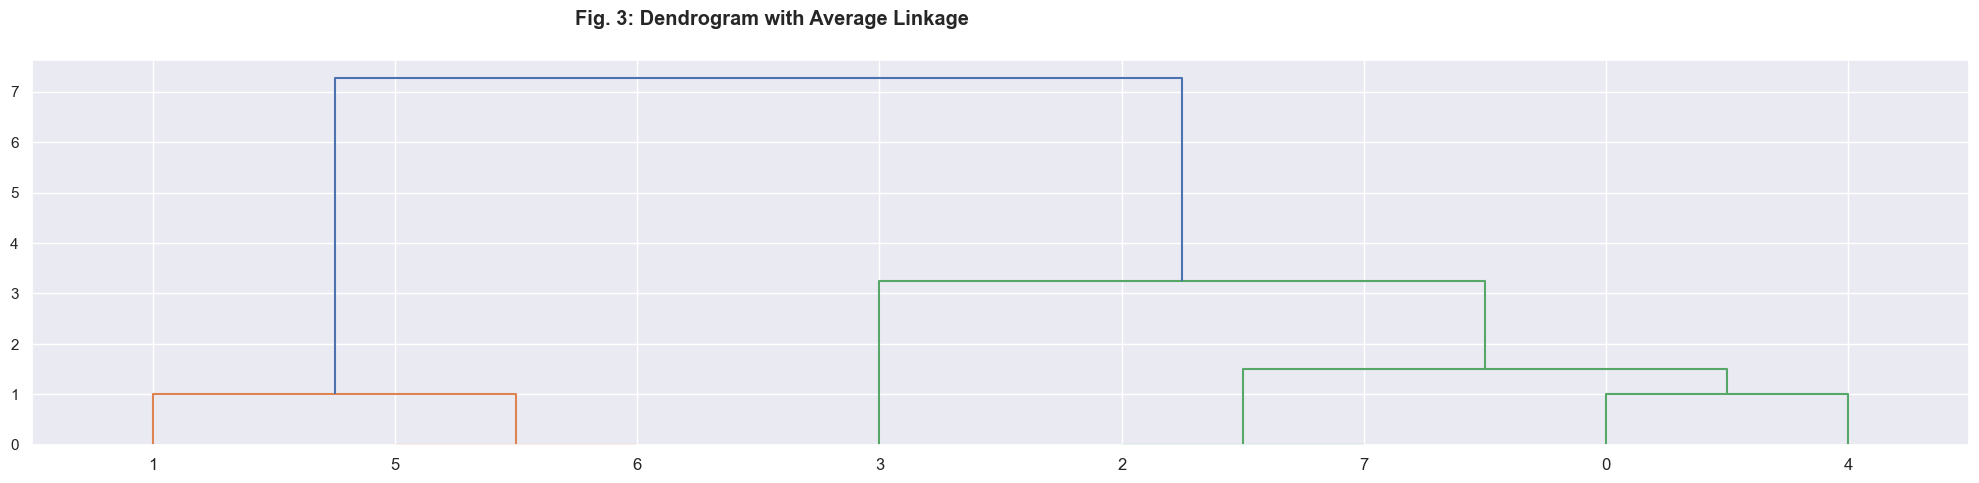

In [46]:
Z = linkage(X, "average")
fig = plt.figure(figsize=(25, 5))
plt.suptitle(
    "Fig. 3: Dendrogram with Average Linkage",
    fontweight="bold",
    horizontalalignment="right",
)
dn = dendrogram(Z)


**4.  Centroid Linkage**: 

This is the distance between the cluster centers and is given by $$d(u,v) = ||c_u - c_v||_2$$ with the linkage specified as in the preceding charts.


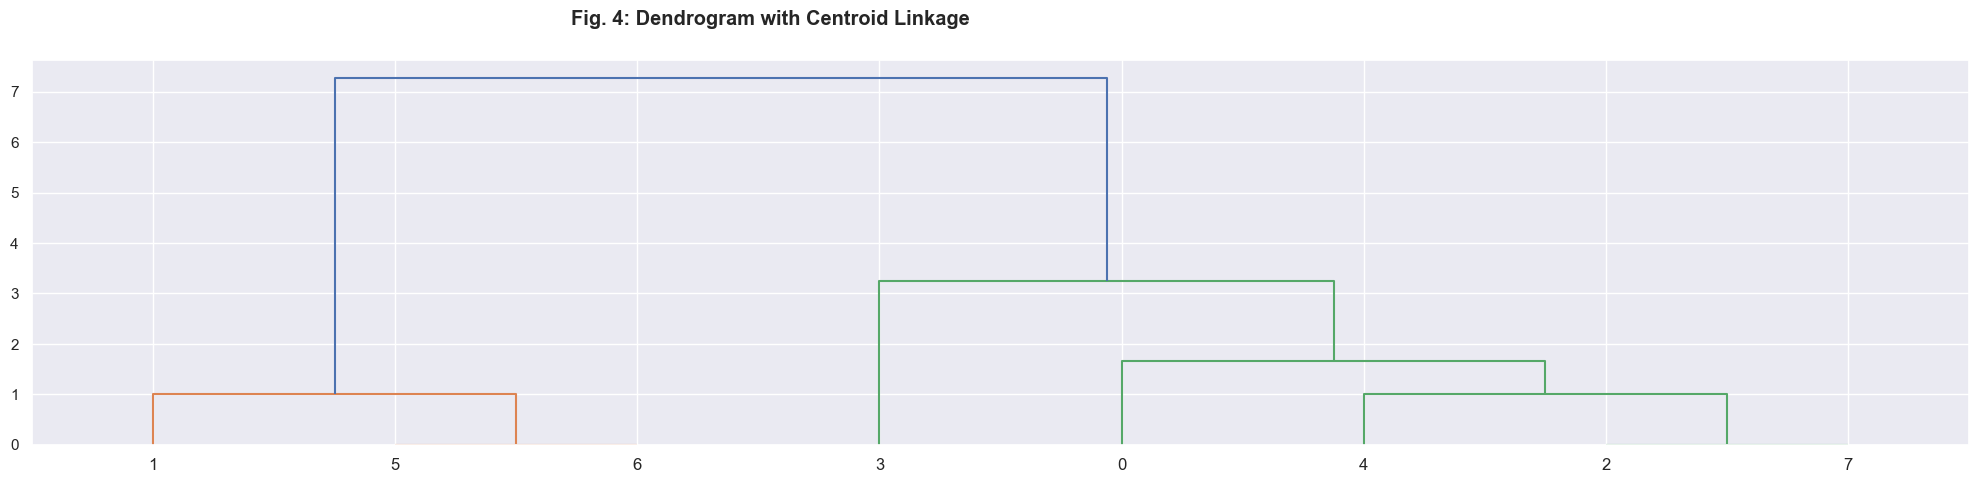

In [47]:
Z = linkage(X, "centroid")
fig = plt.figure(figsize=(25, 5))
plt.suptitle(
    "Fig. 4: Dendrogram with Centroid Linkage",
    fontweight="bold",
    horizontalalignment="right",
)
dn = dendrogram(Z)


**5. Ward's Linkage**: 

Ward's linkage minimizes the increase in the sum of square error at each iteration.

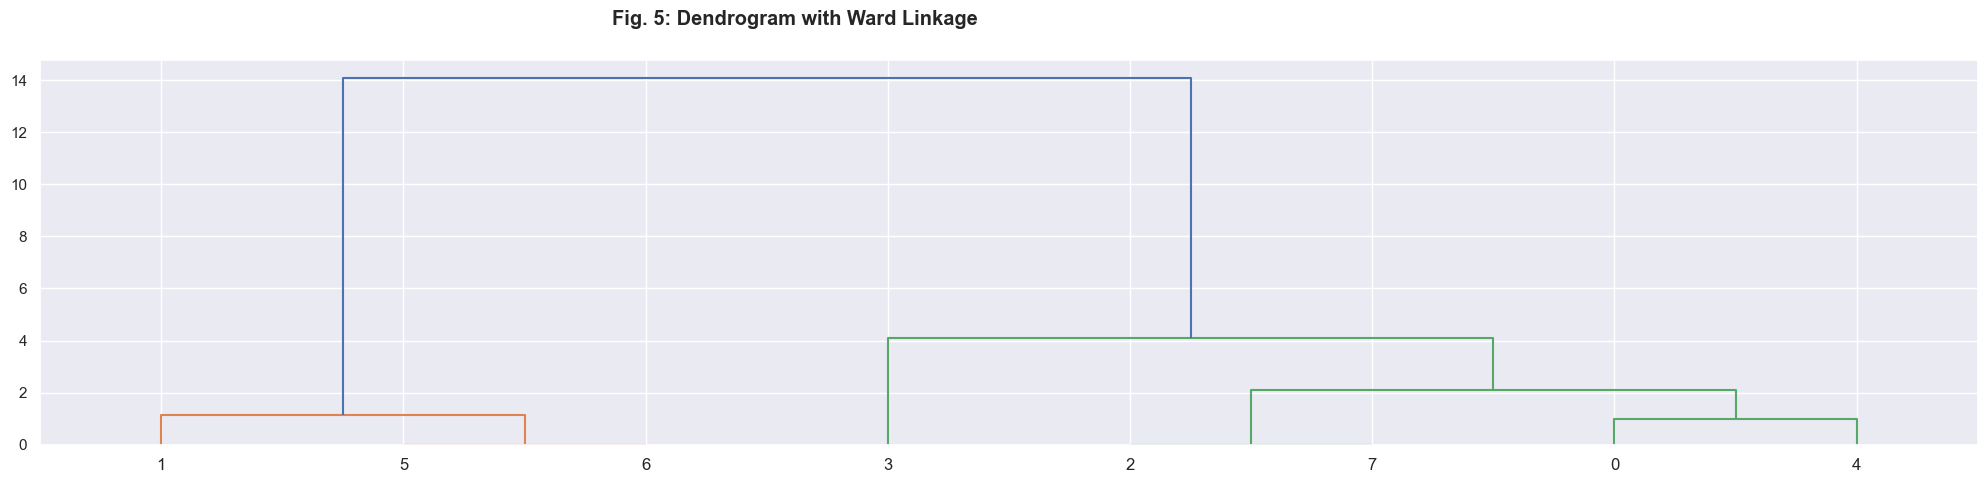

In [48]:
Z = linkage(X, "ward")
fig = plt.figure(figsize=(25, 5))
plt.suptitle(
    "Fig. 5: Dendrogram with Ward Linkage",
    fontweight="bold",
    horizontalalignment="right",
)
dn = dendrogram(Z)

The diagrams we have seen above are called Dendrograms and we chose the number of clusters in hierarchical clustering with the help of a dendrogram.


### **2.4 Dendrogram**

A dendrogram is a diagram that shows the hierarchical relationship between clusters. It shows how clusters are formed at each step. 

Once we have drawn the dendrogram, we slice it horizontally at the desired level then the branches that appear below the cut form individual clusters and its associated membership. Below is an example of a dendrogram with horizontal slices at different levels. 


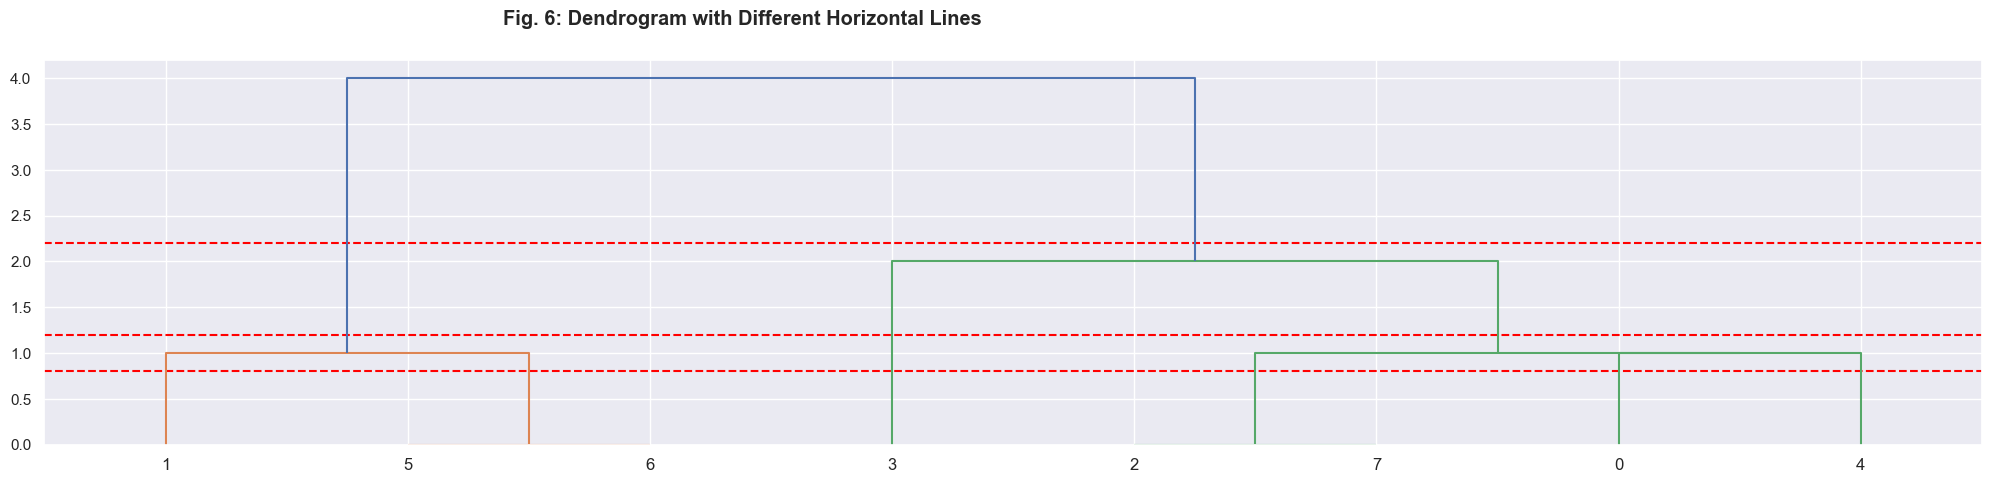

In [49]:
Z = linkage(X)
fig = plt.figure(figsize=(25, 5))
plt.axhline(1.2, color="red", linestyle="--")
plt.axhline(2.2, color="red", linestyle="--")
plt.axhline(0.8, color="red", linestyle="--")
plt.suptitle(
    "Fig. 6: Dendrogram with Different Horizontal Lines",
    fontweight="bold",
    horizontalalignment="right",
)
dn = dendrogram(Z)

## **3. Divisive Hierarchical Clustering**

Divisive hierarchical clustering works in the opposite of agglomerative hierarchical clustering; that is, we start with a single cluster containing all the data points. Then, at each iteration, we split the data into smaller clusters until we have each data point in its own cluster. 

## **4. Implementation of Hierarchical Clustering**

In this demonstration, we use a matrix of daily returns of foreign exchange rates and perform hierarchical clustering to determine if the currencies form clusters that are related to their geographical categories.

### **4.1 Data Scraping**

We start by installing the Yahoo finance API that will be used to download the forex data. We also import libraries for data manipulation and modeling.

In [50]:
# For data manipulation
# For visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# To fetch financial data
import yfinance as yf

plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to compute distances
from scipy.spatial.distance import pdist

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Set the ticker as 'EURUSD=X'
forex_data = yf.download("USDEUR=X", start="2019-01-02", end="2022-06-30")
forex_data = forex_data.reset_index()
euro_df = forex_data[["Date", "Adj Close"]]
euro_df.rename(columns={"Adj Close": "euro"}, inplace=True)
# Set the index to a datetime object

forex_data1 = yf.download("USDRUB=X", start="2019-01-02", end="2022-06-30")
forex_data1 = forex_data1.reset_index()
rub_df = forex_data1[["Date", "Adj Close"]]
rub_df.rename(columns={"Adj Close": "rub"}, inplace=True)

forex_data2 = yf.download("USDGBP=X", start="2019-01-02", end="2022-06-30")
forex_data2 = forex_data2.reset_index()
gbp_df = forex_data2[["Date", "Adj Close"]]
gbp_df.rename(columns={"Adj Close": "gbp"}, inplace=True)

forex_data3 = yf.download("USDJPY=X", start="2019-01-02", end="2022-06-30")
forex_data3 = forex_data3.reset_index()
jpy_df = forex_data3[["Date", "Adj Close"]]
jpy_df.rename(columns={"Adj Close": "jpy"}, inplace=True)

forex_data4 = yf.download("USDKES=X", start="2019-01-02", end="2022-06-30")
forex_data4 = forex_data4.reset_index()
kes_df = forex_data4[["Date", "Adj Close"]]
kes_df.rename(columns={"Adj Close": "kes"}, inplace=True)

forex_data5 = yf.download("USDCNY=X", start="2019-01-02", end="2022-06-30")
forex_data5 = forex_data5.reset_index()
cny_df = forex_data5[["Date", "Adj Close"]]
cny_df.rename(columns={"Adj Close": "cny"}, inplace=True)

forex_data6 = yf.download("USDKRW=X", start="2019-01-02", end="2022-06-30")
forex_data6 = forex_data6.reset_index()
krw_df = forex_data6[["Date", "Adj Close"]]
krw_df.rename(columns={"Adj Close": "krw"}, inplace=True)

forex_data7 = yf.download("USDSGD=X", start="2019-01-02", end="2022-06-30")
forex_data7 = forex_data7.reset_index()
sgd_df = forex_data7[["Date", "Adj Close"]]
sgd_df.rename(columns={"Adj Close": "sgd"}, inplace=True)

forex_data8 = yf.download("USDTWD=X", start="2019-01-02", end="2022-06-30")
forex_data8 = forex_data8.reset_index()
twd_df = forex_data8[["Date", "Adj Close"]]
twd_df.rename(columns={"Adj Close": "twd"}, inplace=True)

forex_data9 = yf.download("USDNGN=X", start="2019-01-02", end="2022-06-30")
forex_data9 = forex_data9.reset_index()
ngn_df = forex_data9[["Date", "Adj Close"]]
ngn_df.rename(columns={"Adj Close": "ngn"}, inplace=True)

forex_data10 = yf.download("USDZAR=X", start="2019-01-02", end="2022-06-30")
forex_data10 = forex_data10.reset_index()
zar_df = forex_data10[["Date", "Adj Close"]]
zar_df.rename(columns={"Adj Close": "zar"}, inplace=True)

forex_data11 = yf.download("USDMYR=X", start="2019-01-02", end="2022-06-30")
forex_data11 = forex_data11.reset_index()
myr_df = forex_data11[["Date", "Adj Close"]]
myr_df.rename(columns={"Adj Close": "myr"}, inplace=True)

forex_data12 = yf.download("USDIDR=X", start="2019-01-02", end="2022-06-30")
forex_data12 = forex_data12.reset_index()
idr_df = forex_data12[["Date", "Adj Close"]]
idr_df.rename(columns={"Adj Close": "idr"}, inplace=True)

forex_data13 = yf.download("USDTHB=X", start="2019-01-02", end="2022-06-30")
forex_data13 = forex_data13.reset_index()
thb_df = forex_data13[["Date", "Adj Close"]]
thb_df.rename(columns={"Adj Close": "thb"}, inplace=True)

forex_data14 = yf.download("USDAUD=X", start="2019-01-02", end="2022-06-30")
forex_data14 = forex_data14.reset_index()
aud_df = forex_data14[["Date", "Adj Close"]]
aud_df.rename(columns={"Adj Close": "aud"}, inplace=True)

forex_data15 = yf.download("USDNZD=X", start="2019-01-02", end="2022-06-30")
forex_data15 = forex_data15.reset_index()
nzd_df = forex_data15[["Date", "Adj Close"]]
nzd_df.rename(columns={"Adj Close": "nzd"}, inplace=True)

forex_data16 = yf.download("USDCAD=X", start="2019-01-02", end="2022-06-30")
forex_data16 = forex_data16.reset_index()
cad_df = forex_data16[["Date", "Adj Close"]]
cad_df.rename(columns={"Adj Close": "cad"}, inplace=True)

forex_data17 = yf.download("USDCHF=X", start="2019-01-02", end="2022-06-30")
forex_data17 = forex_data17.reset_index()
chf_df = forex_data17[["Date", "Adj Close"]]
chf_df.rename(columns={"Adj Close": "chf"}, inplace=True)

forex_data18 = yf.download("USDNOK=X", start="2019-01-02", end="2022-06-30")
forex_data18 = forex_data18.reset_index()
nok_df = forex_data18[["Date", "Adj Close"]]
nok_df.rename(columns={"Adj Close": "nok"}, inplace=True)

forex_data19 = yf.download("USDAUD=X", start="2019-01-02", end="2022-06-30")
forex_data19 = forex_data19.reset_index()
sek_df = forex_data19[["Date", "Adj Close"]]
sek_df.rename(columns={"Adj Close": "sek"}, inplace=True)

forex_data20 = yf.download("USDARS=X", start="2019-01-02", end="2022-06-30")
forex_data20 = forex_data20.reset_index()
ars_df = forex_data20[["Date", "Adj Close"]]
ars_df.rename(columns={"Adj Close": "ars"}, inplace=True)

forex_data21 = yf.download("USDPLN=X", start="2019-01-02", end="2022-06-30")
forex_data21 = forex_data21.reset_index()
pln_df = forex_data21[["Date", "Adj Close"]]
pln_df.rename(columns={"Adj Close": "pln"}, inplace=True)

forex_data22 = yf.download("USDPHP=X", start="2019-01-02", end="2022-06-30")
forex_data22 = forex_data22.reset_index()
php_df = forex_data22[["Date", "Adj Close"]]
php_df.rename(columns={"Adj Close": "php"}, inplace=True)

forex_data23 = yf.download("USDRON=X", start="2019-01-02", end="2022-06-30")
forex_data23 = forex_data23.reset_index()
ron_df = forex_data23[["Date", "Adj Close"]]
ron_df.rename(columns={"Adj Close": "ron"}, inplace=True)

forex_data24 = yf.download("USDHUF=X", start="2019-01-02", end="2022-06-30")
forex_data24 = forex_data24.reset_index()
huf_df = forex_data24[["Date", "Adj Close"]]
huf_df.rename(columns={"Adj Close": "huf"}, inplace=True)

forex_data25 = yf.download("USDBRL=X", start="2019-01-02", end="2022-06-30")
forex_data25 = forex_data25.reset_index()
brl_df = forex_data25[["Date", "Adj Close"]]
brl_df.rename(columns={"Adj Close": "brl"}, inplace=True)

forex_data26 = yf.download("USDCLP=X", start="2019-01-02", end="2022-06-30")
forex_data26 = forex_data26.reset_index()
clp_df = forex_data26[["Date", "Adj Close"]]
clp_df.rename(columns={"Adj Close": "clp"}, inplace=True)

forex_data27 = yf.download("USDMXN=X", start="2019-01-02", end="2022-06-30")
forex_data27 = forex_data27.reset_index()
mxn_df = forex_data27[["Date", "Adj Close"]]
mxn_df.rename(columns={"Adj Close": "mxn"}, inplace=True)

forex_data28 = yf.download("USDCOP=X", start="2019-01-02", end="2022-06-30")
forex_data28 = forex_data28.reset_index()
cop_df = forex_data28[["Date", "Adj Close"]]
cop_df.rename(columns={"Adj Close": "cop"}, inplace=True)

forex_data29 = yf.download("USDILS=X", start="2019-01-02", end="2022-06-30")
forex_data29 = forex_data29.reset_index()
ils_df = forex_data29[["Date", "Adj Close"]]
ils_df.rename(columns={"Adj Close": "ils"}, inplace=True)

forex_data30 = yf.download("USDTRY=X", start="2019-01-02", end="2022-06-30")
forex_data30 = forex_data30.reset_index()
try_df = forex_data30[["Date", "Adj Close"]]
try_df.rename(columns={"Adj Close": "try"}, inplace=True)

forex_data31 = yf.download("USDINR=X", start="2019-01-02", end="2022-06-30")
forex_data31 = forex_data31.reset_index()
inr_df = forex_data31[["Date", "Adj Close"]]
inr_df.rename(columns={"Adj Close": "inr"}, inplace=True)

[*********************100%***********************]  1 of 1 completed
C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\342855321.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_df.rename(columns={"Adj Close": "euro"}, inplace=True)
[*********************100%***********************]  1 of 1 completed
C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\342855321.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rub_df.rename(columns={"Adj Close": "rub"}, inplace=True)
[*********************100%***********************]  1 of 1 completed
C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\342855321.py:47: SettingWith

In [51]:
from functools import reduce

df_currencies = reduce(
    lambda x, y: pd.merge(x, y, on="Date", how="outer"),
    [
        kes_df,
        ars_df,
        php_df,
        myr_df,
        ils_df,
        cop_df,
        euro_df,
        ngn_df,
        huf_df,
        ron_df,
        cny_df,
        rub_df,
        clp_df,
        sgd_df,
        twd_df,
        krw_df,
        idr_df,
        thb_df,
        inr_df,
        pln_df,
        try_df,
        brl_df,
        mxn_df,
        zar_df,
        gbp_df,
        jpy_df,
        aud_df,
        nzd_df,
        cad_df,
        chf_df,
        nok_df,
        sek_df,
    ],
)
df_currencies.set_index("Date", inplace=True)

df_currencies.head(10)

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,100.839996,37.584999,52.470001,4.1295,3.73567,3245.000000,0.87247,362.109985,280.070007,4.0535,6.8775,68.892502,693.500000,1.36240,30.500999,1113.800049,14460.000000,32.333000,69.709999,3.74010,5.28870,3.8799,19.628300,14.38765,0.78405,109.667999,1.41886,1.48951,1.36254,0.98200,8.64645,1.41886
2019-01-03,100.430000,37.764000,52.549999,4.1350,3.74285,3235.000000,0.88354,364.000000,284.700012,4.1140,6.8611,69.025803,696.299988,1.36710,30.759001,1122.180054,14409.700195,32.270000,69.959999,3.79770,5.51530,3.7863,19.607700,14.55830,0.79860,107.441002,1.44530,1.50748,1.36312,0.98870,8.77981,1.44530
2019-01-04,100.449997,37.445999,52.570000,4.1400,3.72550,3243.000000,0.87788,363.500000,281.528015,4.0887,6.8711,68.859100,693.299988,1.36410,30.863001,1124.119995,14375.400391,32.175999,70.300003,3.76560,5.47220,3.7551,19.604500,14.30900,0.79184,107.807999,1.42730,1.49510,1.34788,0.98710,8.69065,1.42730
2019-01-07,101.050003,37.304001,52.380001,4.1220,3.71048,3191.000000,0.87639,364.000000,281.170013,4.0811,6.8684,67.566002,680.700012,1.35840,30.783001,1114.400024,14267.000000,31.930000,69.525002,3.76038,5.32700,3.6612,19.381901,13.98070,0.78524,108.522003,1.40375,1.48291,1.33693,0.98576,8.60577,1.40375
2019-01-08,100.110001,37.298000,52.294998,4.1123,3.70635,3179.000000,0.87110,364.000000,279.632996,4.0570,6.8500,66.748299,681.000000,1.35520,30.802999,1116.400024,14083.000000,31.927000,69.809998,3.74111,5.38380,3.7341,19.364620,13.86070,0.78210,108.615997,1.39940,1.48067,1.32960,0.97910,8.52646,1.39940
2019-01-09,100.839996,37.536999,52.500000,4.1143,3.69700,3160.300049,0.87290,363.000000,280.739990,4.0709,6.8522,66.886497,679.900024,1.35710,30.816000,1121.050049,14138.000000,32.012001,70.330002,3.75000,5.48250,3.7124,19.327900,13.94630,0.78506,108.776001,1.39600,1.48357,1.32470,0.98077,8.53240,1.39600
2019-01-10,100.849998,37.356998,52.209000,4.1015,3.67380,3132.500000,0.86543,364.880005,277.799988,4.0392,6.8156,66.652702,675.500000,1.35260,30.711000,1118.670044,14130.000000,31.888000,70.550499,3.72290,5.47560,3.6800,19.205900,13.84390,0.78127,108.189003,1.39360,1.47252,1.32115,0.97395,8.45935,1.39360
2019-01-11,100.809998,37.355999,52.113998,4.0950,3.66683,3135.000000,0.86880,364.500000,278.875000,4.0613,6.7875,66.867203,675.599976,1.35140,30.778999,1116.550049,14048.000000,31.910000,70.720001,3.73223,5.42442,3.7079,19.130751,13.85456,0.78407,108.297997,1.39140,1.47380,1.32390,0.98401,8.47260,1.39140
2019-01-14,100.760002,36.929001,52.169998,4.0935,3.67150,3145.199951,0.87259,364.500000,280.027008,4.0756,6.7620,66.852203,674.400024,1.35331,30.785999,1118.599976,14038.000000,31.931000,70.370003,3.74326,5.48080,3.6596,19.138901,13.85670,0.77822,108.458000,1.38790,1.46590,1.32674,0.98370,8.53830,1.38790


In [52]:
df_currencies.shape

(910, 32)

In [53]:
df_currencies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 910 entries, 2019-01-02 to 2022-06-29
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kes     910 non-null    float64
 1   ars     910 non-null    float64
 2   php     910 non-null    float64
 3   myr     909 non-null    float64
 4   ils     909 non-null    float64
 5   cop     910 non-null    float64
 6   euro    910 non-null    float64
 7   ngn     910 non-null    float64
 8   huf     910 non-null    float64
 9   ron     910 non-null    float64
 10  cny     909 non-null    float64
 11  rub     910 non-null    float64
 12  clp     910 non-null    float64
 13  sgd     910 non-null    float64
 14  twd     910 non-null    float64
 15  krw     910 non-null    float64
 16  idr     910 non-null    float64
 17  thb     910 non-null    float64
 18  inr     910 non-null    float64
 19  pln     910 non-null    float64
 20  try     910 non-null    float64
 21  brl     910 non-null

In [54]:
df_currencies.describe()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
count,910.000000,910.000000,910.000000,909.000000,909.000000,910.000000,910.000000,910.000000,910.000000,910.000000,909.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,106.271934,77.051689,50.485349,4.175382,3.389244,3617.320032,0.877961,383.293233,306.353554,4.253118,6.713804,71.452912,761.757275,1.362522,29.281230,1171.949242,14347.385474,31.742338,73.359169,3.916159,8.266750,4.864419,20.328788,15.240861,0.764365,110.552330,1.405214,1.493344,1.302014,0.948027,8.953511,1.405214
std,4.893143,23.725583,1.559282,0.087830,0.157674,278.697328,0.033852,22.832106,20.648835,0.163693,0.263543,8.933727,57.698667,0.023969,1.256438,44.064748,404.634164,1.264013,2.290538,0.188429,3.120143,0.669541,1.305374,1.155624,0.032379,6.212416,0.075673,0.074478,0.045776,0.037266,0.509764,0.075673
min,98.289001,36.929001,47.556763,4.004000,3.075430,3038.899902,0.810300,305.910004,274.089996,3.942800,6.308400,53.090000,647.599976,1.317210,27.423700,1083.680054,13213.240234,29.680000,68.367599,3.615330,5.180200,3.642800,18.542999,13.248800,0.702900,102.678001,1.253600,1.343130,1.203800,0.878070,7.649780,1.253600
25%,101.525351,59.644659,48.834499,4.120000,3.248600,3393.562500,0.847293,360.500000,294.328499,4.136750,6.465000,65.080400,714.999985,1.347850,27.963474,1133.102448,14121.199951,30.780001,71.423975,3.789040,5.891652,4.127475,19.364770,14.435825,0.736488,107.198999,1.357205,1.433493,1.265857,0.916613,8.589165,1.357205
50%,106.849998,76.137150,50.683500,4.163000,3.405050,3666.599976,0.883890,380.000000,301.547012,4.243000,6.711300,72.728699,769.350006,1.358005,29.330750,1177.005005,14287.196289,31.430000,73.675648,3.859150,7.352600,5.139461,20.024710,14.924550,0.764695,109.124500,1.399521,1.491780,1.307485,0.940440,8.849730,1.399521
75%,109.375002,97.062557,51.814502,4.208500,3.516800,3834.137512,0.901707,410.364998,312.455002,4.337025,6.971900,74.637774,805.357483,1.374180,30.437999,1198.150024,14486.501709,32.723501,74.988373,3.976632,8.614825,5.402748,20.711285,15.789650,0.788078,111.353252,1.448519,1.538960,1.330150,0.983745,9.158745,1.448519
max,116.820000,124.855911,54.890999,4.440000,3.836750,4174.750000,0.963430,419.000000,384.059998,4.766700,7.178000,138.965103,920.090027,1.456300,31.694000,1299.810059,16504.800781,35.484001,79.073196,4.583200,17.346001,5.886400,25.336201,19.248600,0.869990,136.268997,1.741280,1.777430,1.449820,1.020300,11.759900,1.741280


In [55]:
# Find missing values
df_currencies.isna().sum()

kes     0
ars     0
php     0
myr     1
ils     1
cop     0
euro    0
ngn     0
huf     0
ron     0
cny     1
rub     0
clp     0
sgd     0
twd     0
krw     0
idr     0
thb     0
inr     0
pln     0
try     0
brl     0
mxn     0
zar     0
gbp     0
jpy     0
aud     0
nzd     0
cad     0
chf     0
nok     0
sek     0
dtype: int64

In [56]:
# Impute missing values with forward fill
df_currencies.fillna(method="ffill", inplace=True)
df_currencies.isna().sum()

C:\Users\adevr\AppData\Local\Temp\ipykernel_6544\679191041.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_currencies.fillna(method="ffill", inplace=True)


kes     0
ars     0
php     0
myr     0
ils     0
cop     0
euro    0
ngn     0
huf     0
ron     0
cny     0
rub     0
clp     0
sgd     0
twd     0
krw     0
idr     0
thb     0
inr     0
pln     0
try     0
brl     0
mxn     0
zar     0
gbp     0
jpy     0
aud     0
nzd     0
cad     0
chf     0
nok     0
sek     0
dtype: int64

In [57]:
# Scaling the data to bring it to the same scale

sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df_currencies),
    columns=df_currencies.columns,
)
subset_scaled_df.head()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
0,-1.110723,-1.664380,1.273499,-0.522395,2.193892,-1.336664,-0.162309,-0.928294,-1.273583,-1.220130,0.620241,-0.286758,-1.183646,-0.005082,0.971350,-1.320356,0.278465,0.467548,-1.594026,-0.934869,-0.954984,-1.471247,-0.536914,-0.738718,0.608286,-0.142427,0.180433,-0.051500,1.322929,0.912135,-0.602691,0.180433
1,-1.194559,-1.656832,1.324832,-0.459709,2.239402,-1.372565,0.164883,-0.845469,-1.049234,-0.850335,0.557984,-0.271829,-1.135092,0.191107,1.176807,-1.130077,0.154087,0.417680,-1.484821,-0.629015,-0.882320,-1.611121,-0.552703,-0.590968,1.057896,-0.501100,0.530023,0.189913,1.335605,1.092024,-0.340936,0.530023
2,-1.190470,-1.670242,1.337666,-0.402729,2.129430,-1.343845,-0.002408,-0.867380,-1.202934,-1.004978,0.595945,-0.290499,-1.187115,0.065877,1.259626,-1.086028,0.069273,0.343271,-1.336301,-0.799465,-0.896141,-1.657746,-0.555157,-0.806814,0.849006,-0.441992,0.292027,0.023597,1.002500,1.049066,-0.515937,0.292027
3,-1.067780,-1.676230,1.215748,-0.607867,2.034225,-1.530529,-0.046448,-0.845469,-1.220281,-1.051431,0.585696,-0.435322,-1.405610,-0.172056,1.195919,-1.306733,-0.198771,0.148547,-1.674836,-0.827183,-0.942703,-1.798068,-0.725775,-1.091059,0.645059,-0.326997,-0.019352,-0.140166,0.763163,1.013088,-0.682537,-0.019352
4,-1.259992,-1.676484,1.161204,-0.718419,2.008048,-1.573611,-0.202802,-0.845469,-1.294758,-1.198737,0.515845,-0.526902,-1.400408,-0.305630,1.211844,-1.261320,-0.653753,0.146173,-1.550344,-0.929505,-0.924488,-1.689127,-0.739021,-1.194956,0.548031,-0.311859,-0.076867,-0.170260,0.602948,0.834272,-0.838205,-0.076867


In [58]:
# Generate simple percentage returns to calculate the respective betas

df_returns = (df_currencies / df_currencies.shift(-1)) - 1
df_returns.head()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.004082,-0.004740,-0.001522,-0.001330,-0.001918,0.003091,-0.012529,-0.005192,-0.016263,-0.014706,0.002390,-0.001931,-0.004021,-0.003438,-0.008388,-0.007468,0.003491,0.001952,-0.003573,-0.015167,-0.041086,0.024721,0.001051,-0.011722,-0.018219,0.020728,-0.018294,-0.011921,-0.000425,-0.006777,-0.015189,-0.018294
2019-01-03,-0.000199,0.008492,-0.000380,-0.001208,0.004657,-0.002467,0.006447,0.001376,0.011267,0.006188,-0.001455,0.002421,0.004327,0.002199,-0.003370,-0.001726,0.002386,0.002921,-0.004836,0.008525,0.007876,0.008309,0.000163,0.017423,0.008537,-0.003404,0.012611,0.008280,0.011307,0.001621,0.010259,0.012611
2019-01-04,-0.005938,0.003807,0.003627,0.004367,0.004048,0.016296,0.001700,-0.001374,0.001273,0.001862,0.000393,0.019138,0.018510,0.004196,0.002599,0.008722,0.007598,0.007704,0.011147,0.001388,0.027257,0.025647,0.011485,0.023482,0.008405,-0.006579,0.016777,0.008220,0.008190,0.001359,0.009863,0.016777
2019-01-07,0.009390,0.000161,0.001625,0.002359,0.001114,0.003775,0.006073,0.000000,0.005497,0.005940,0.002686,0.012251,-0.000441,0.002361,-0.000649,-0.001791,0.013065,0.000094,-0.004082,0.005151,-0.010550,-0.019523,0.000892,0.008658,0.004015,-0.000865,0.003108,0.001513,0.005513,0.006802,0.009302,0.003108
2019-01-08,-0.007239,-0.006367,-0.003905,-0.000486,0.002529,0.005917,-0.002062,0.002755,-0.003943,-0.003414,-0.000321,-0.002066,0.001618,-0.001400,-0.000422,-0.004148,-0.003890,-0.002655,-0.007394,-0.002371,-0.018003,0.005845,0.001900,-0.006138,-0.003770,-0.001471,0.002436,-0.001955,0.003699,-0.001703,-0.000696,0.002436


### **4.2 Model Training**


In [59]:
subset_scaled_df.drop(subset_scaled_df.tail(1).index, inplace=True)
subset_scaled_df.tail()

,kes,ars,php,myr,ils,cop,euro,ngn,huf,ron,cny,rub,clp,sgd,twd,krw,idr,thb,inr,pln,try,brl,mxn,zar,gbp,jpy,aud,nzd,cad,chf,nok,sek
904,2.111882,1.966231,2.518345,2.514849,0.370437,1.306543,2.112377,1.378500,3.297225,2.680155,-0.097624,-1.972592,1.937725,0.959590,0.352596,2.716832,1.197578,2.804251,2.086130,2.577192,2.911483,0.386119,-0.147004,0.583295,1.571469,4.141836,0.412479,1.202169,-0.192877,0.483085,1.749592,0.412479
905,2.122107,1.974181,2.511930,2.594626,0.292664,1.433992,2.028732,1.373681,3.302799,2.595194,-0.049411,-1.846595,2.219689,1.026798,0.310946,2.854889,1.225520,2.855702,2.111551,2.805468,2.910392,0.491922,-0.214071,0.570351,1.603915,4.102378,0.568102,1.360842,-0.123151,0.368438,1.879626,0.568102
906,2.132330,1.983559,2.685179,2.606022,0.385839,1.656003,2.145776,1.371489,3.547498,2.716829,-0.063837,-1.902594,2.458475,1.111954,0.264281,2.903253,1.222552,2.961774,2.089406,2.921225,2.911451,0.558272,-0.244424,0.601347,1.583520,3.911686,0.572862,1.309120,-0.072225,0.357967,2.004693,0.572862
907,2.142555,1.984951,2.826990,2.554738,0.135343,1.871983,2.023412,1.367106,3.515275,2.572577,-0.096105,-2.025790,2.698473,0.960008,0.328705,2.641676,1.220574,2.934861,2.137409,2.744936,2.694354,0.563352,-0.334363,0.453718,1.539023,3.947441,0.462855,1.214004,-0.268940,0.248691,1.738011,0.462855
908,2.152779,2.007486,2.807099,2.577535,0.191121,1.844447,1.984397,1.367545,3.587958,2.531627,-0.088891,-2.056590,2.745641,0.953330,0.118472,2.594217,1.096938,2.862828,2.219883,2.695020,2.660652,0.556479,-0.326437,0.507744,1.569924,4.007515,0.520239,1.282252,-0.330359,0.218352,1.646665,0.520239


We now find the **cophenetic correlation** using a combination of distance metrics and linkage methods. A cophenetic correlation measures the dendrogram's ability to preserve the initial unmodeled data points. The higher the cophenetic correlation, the better the performance of a dendogram in preserving the original distance. 

The cophenetic correlation is defined as:
$$c = \frac{\sum_{i<j} (Y_{ij} - y)(Z_{ij} - z)}{\sum_{i<j}{(Y_{ij} - y)\sum_{i<j}(Z_{ij} - z)}}$$

where

- $Y_{ij}$ is the distance between $i$ and $j$ in $Y$.
- $Z_{ij}$ is the cophenetic distance between $i$ and $j$.
- $y$ and $z$ are the mean of $Y$ and $Z$ respectively.

In [60]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df.T, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df.T))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.4514542027603476
Cophenetic correlation for Euclidean distance and complete linkage is 0.6603754108840691
Cophenetic correlation for Euclidean distance and average linkage is 0.7068314554168657
Cophenetic correlation for Euclidean distance and weighted linkage is 0.730119008220271
Cophenetic correlation for Chebyshev distance and single linkage is 0.1974737788849682
Cophenetic correlation for Chebyshev distance and complete linkage is 0.4593880400987013
Cophenetic correlation for Chebyshev distance and average linkage is 0.36672824744493543
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.3142745892307674
Cophenetic correlation for Cityblock distance and single linkage is 0.4822957833911452
Cophenetic correlation for Cityblock distance and complete linkage is 0.7352727905521788
Cophenetic correlation for Cityblock distance and average linkage is 0.690302094643408
Cophenetic correlation for City

We now identify the distance metric and linkage method that give the highest cophenetic correlation.

In [61]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7352727905521788, which is obtained with Cityblock distance and complete linkage


Since the Euclidean distance gives us the best performance, we combine it with different linkage methods and evaluate which combination will improve our performance.

In [62]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df.T, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df.T))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.4514542027603476
Cophenetic correlation for complete linkage is 0.6603754108840691
Cophenetic correlation for average linkage is 0.7068314554168657
Cophenetic correlation for centroid linkage is 0.7447300507332353
Cophenetic correlation for ward linkage is 0.7089770637974209
Cophenetic correlation for weighted linkage is 0.730119008220271


Again, we print the linkage method that gives the highest cophenetic correlation.

In [63]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7447300507332353, which is obtained with centroid linkage


Let us plot the graphs of different dendrograms to visualize how clusters vary with different linkage methods.

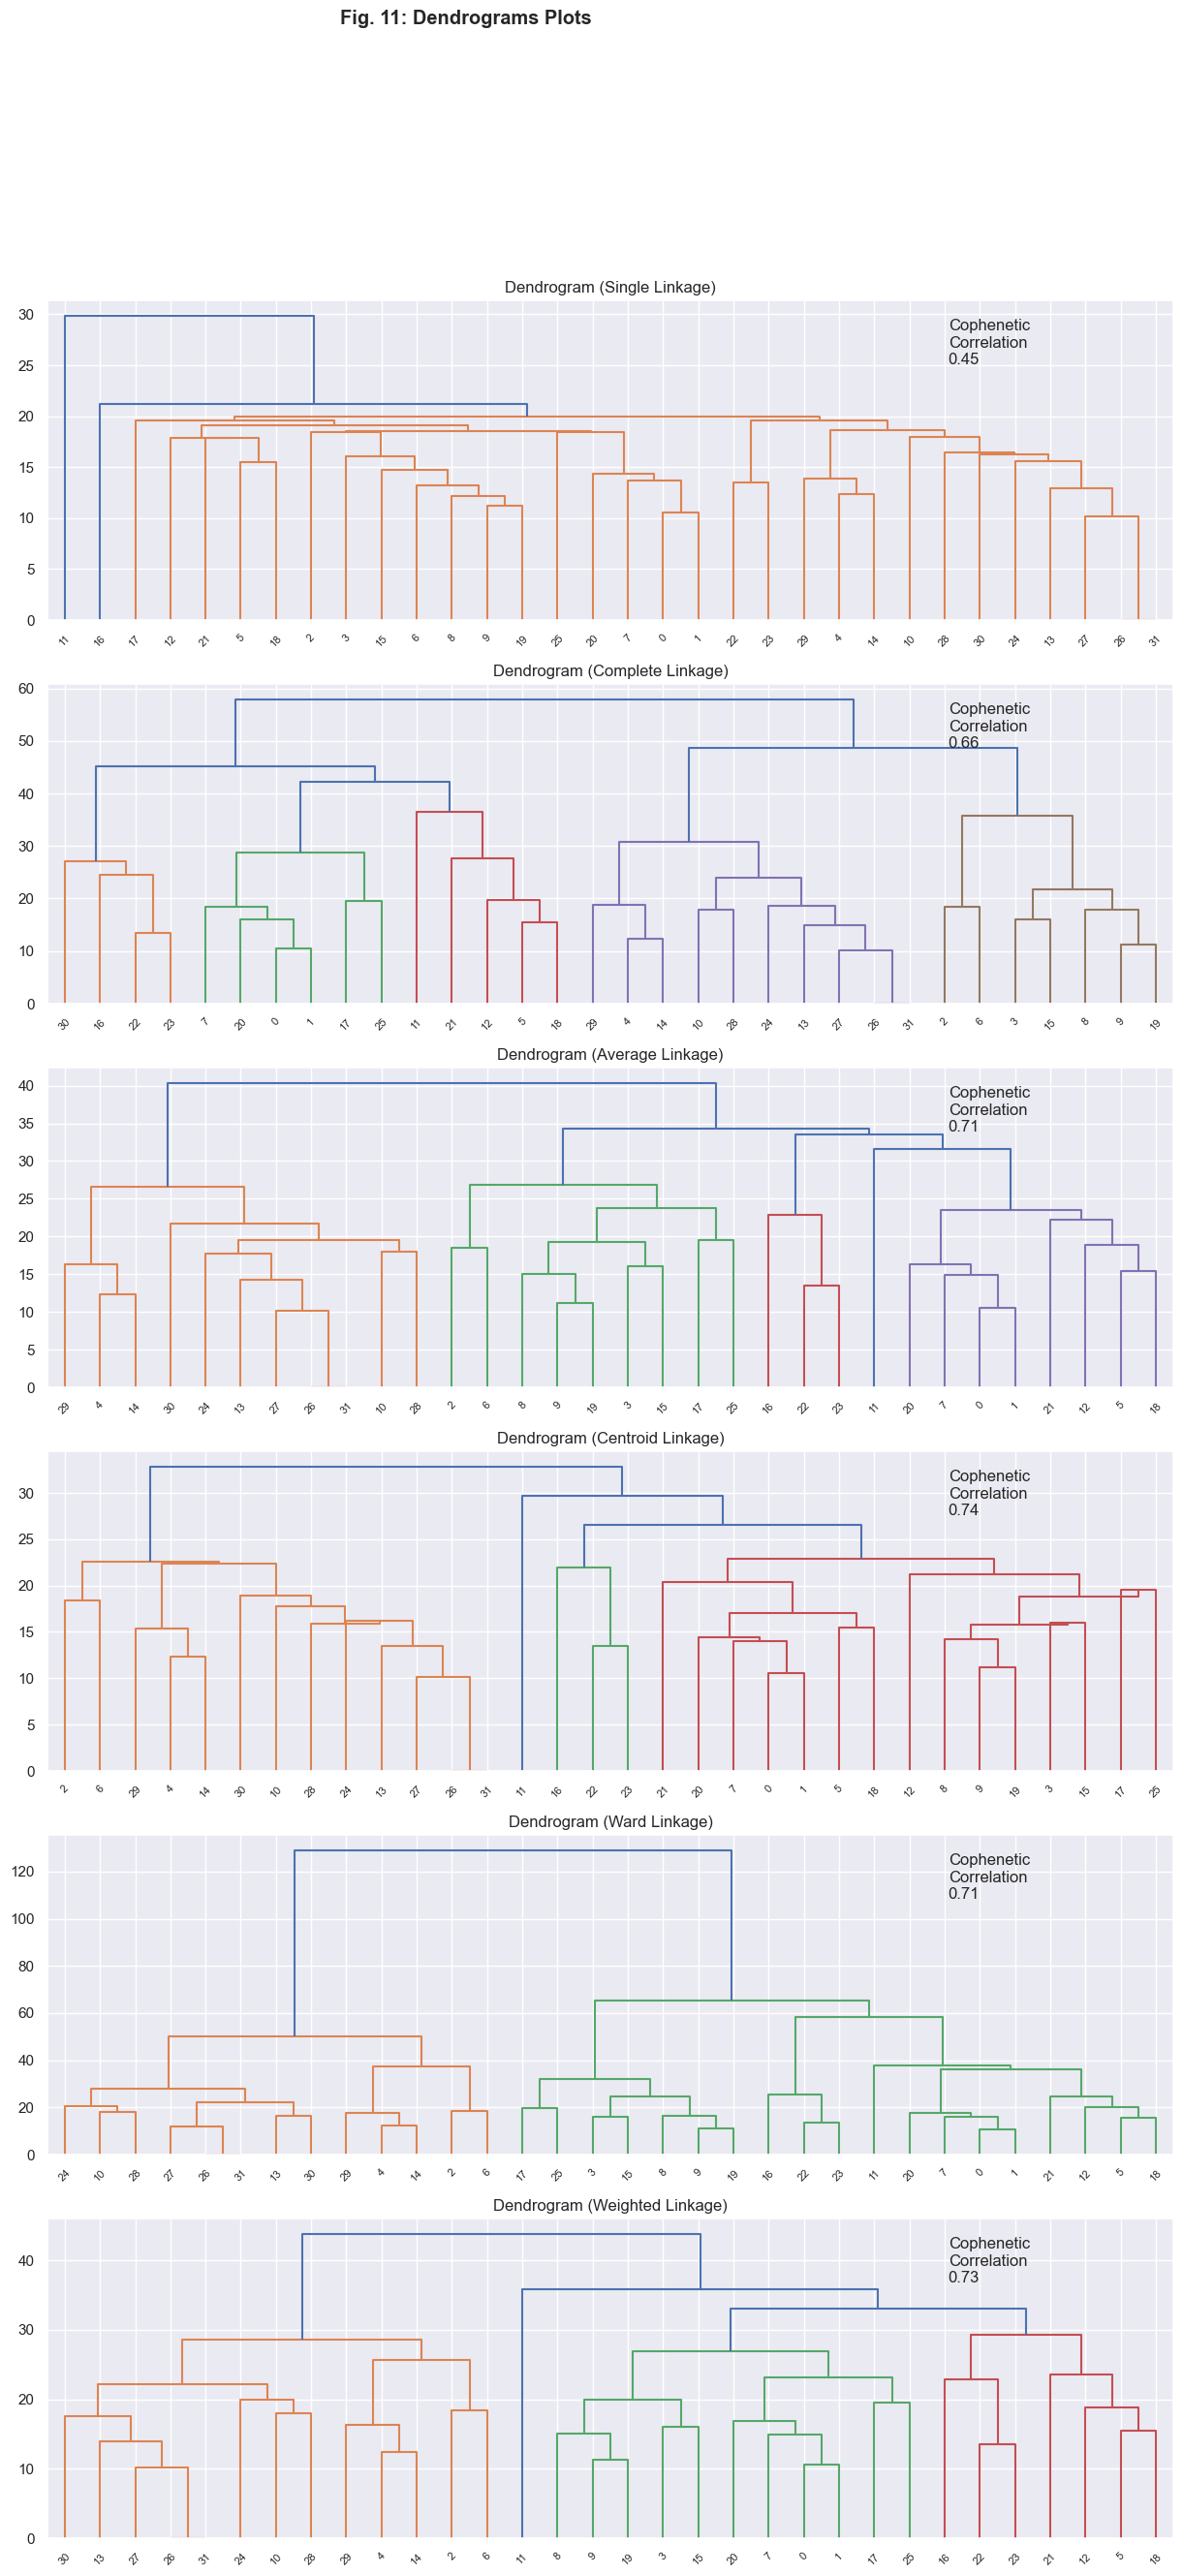

In [64]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))
# `plt.suptitle`()

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df.T, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    fig.suptitle(
        "Fig. 11: Dendrograms Plots", fontweight="bold", horizontalalignment="right"
    )

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df.T))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [65]:
HCmodel = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df.T)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [66]:
df_currencies_t = df_currencies.T
subset_scaled_df_t = subset_scaled_df.T

subset_scaled_df_t["HC_Clusters"] = HCmodel.labels_
df_currencies_t["HC_Clusters"] = HCmodel.labels_

cluster_profile = df_currencies_t.groupby("HC_Clusters").mean()

cluster_profile

Date,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,2019-01-17 00:00:00,2019-01-18 00:00:00,2019-01-21 00:00:00,2019-01-22 00:00:00,2019-01-23 00:00:00,2019-01-24 00:00:00,2019-01-25 00:00:00,2019-01-28 00:00:00,2019-01-29 00:00:00,2019-01-30 00:00:00,2019-01-31 00:00:00,2019-02-01 00:00:00,2019-02-04 00:00:00,2019-02-05 00:00:00,2019-02-06 00:00:00,2019-02-07 00:00:00,2019-02-08 00:00:00,2019-02-11 00:00:00,2019-02-12 00:00:00,2019-02-13 00:00:00,2019-02-14 00:00:00,2019-02-15 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,2019-02-25 00:00:00,2019-02-26 00:00:00,2019-02-27 00:00:00,2019-02-28 00:00:00,2019-03-01 00:00:00,2019-03-04 00:00:00,2019-03-05 00:00:00,2019-03-06 00:00:00,2019-03-07 00:00:00,2019-03-08 00:00:00,2019-03-11 00:00:00,2019-03-12 00:00:00,2019-03-13 00:00:00,2019-03-14 00:00:00,2019-03-15 00:00:00,2019-03-18 00:00:00,2019-03-19 00:00:00,2019-03-20 00:00:00,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-04-01 00:00:00,2019-04-02 00:00:00,2019-04-03 00:00:00,2019-04-04 00:00:00,2019-04-05 00:00:00,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-15 00:00:00,2019-04-16 00:00:00,2019-04-17 00:00:00,2019-04-18 00:00:00,2019-04-19 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-01 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-13 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00,2019-05-23 00:00:00,2019-05-24 00:00:00,2019-05-27 00:00:00,2019-05-28 00:00:00,2019-05-29 00:00:00,2019-05-30 00:00:00,2019-05-31 00:00:00,2019-06-03 00:00:00,2019-06-04 00:00:00,2019-06-05 00:00:00,2019-06-06 00:00:00,2019-06-07 00:00:00,2019-06-10 00:00:00,2019-06-11 00:00:00,2019-06-12 00:00:00,2019-06-13 00:00:00,2019-06-14 00:00:00,2019-06-17 00:00:00,2019-06-18 00:00:00,2019-06-19 00:00:00,2019-06-20 00:00:00,2019-06-21 00:00:00,2019-06-24 00:00:00,2019-06-25 00:00:00,2019-06-26 00:00:00,2019-06-27 00:00:00,2019-06-28 00:00:00,2019-07-01 00:00:00,2019-07-02 00:00:00,2019-07-03 00:00:00,2019-07-04 00:00:00,2019-07-05 00:00:00,2019-07-08 00:00:00,2019-07-09 00:00:00,2019-07-10 00:00:00,2019-07-11 00:00:00,2019-07-12 00:00:00,2019-07-15 00:00:00,2019-07-16 00:00:00,2019-07-17 00:00:00,2019-07-18 00:00:00,2019-07-19 00:00:00,2019-07-22 00:00:00,2019-07-23 00:00:00,2019-07-24 00:00:00,2019-07-25 00:00:00,2019-07-26 00:00:00,2019-07-29 00:00:00,2019-07-30 00:00:00,2019-07-31 00:00:00,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00,2019-08-07 00:00:00,2019-08-08 00:00:00,2019-08-09 00:00:00,2019-08-12 00:00:00,2019-08-13 00:00:00,2019-08-14 00:00:00,2019-08-15 00:00:00,2019-08-16 00:00:00,2019-08-19 00:00:00,2019-08-20 00:00:00,2019-08-21 00:00:00,2019-08-22 00:00:00,2019-08-23 00:00:00,2019-08-26 00:00:00,2019-08-27 00:00:00,2019-08-28 00:00:00,2019-08-29 00:00:00,2019-08-30 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,2019-09-04 00:00:00,2019-09-05 00:00:00,2019-09-06 00:00:00,2019-09-09 00:00:00,2019-09-10 00:00:00,2019-09-11 00:00:00,2019-09-12 00:00:00,2019-09-13 00:00:00,2019-09-16 00:00:00,2019-09-17 00:00:00,2019-09-18 00:00:00,2019-09-19 00:00:00,2019-09-20 00:00:00,2019-09-23 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-30 00:00:00,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:0

We finally see the composition of 3 different clusters and the outlier which will be the column 'HC Cluster' that was engineered above.

In [67]:
# let's see the names of the securities in each cluster
for cl in df_currencies_t["HC_Clusters"].unique():
    print(
        "The",
        df_currencies_t[df_currencies_t["HC_Clusters"] == cl].iloc[:, 0].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df_currencies_t[df_currencies_t["HC_Clusters"] == cl].iloc[:, 0].index)
    print("-" * 100, "\n")

The 12 Securities in cluster 0 are:
Index(['kes', 'ars', 'cop', 'ngn', 'rub', 'clp', 'idr', 'inr', 'try', 'brl',
       'mxn', 'zar'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 

The 9 Securities in cluster 2 are:
Index(['php', 'myr', 'euro', 'huf', 'ron', 'krw', 'thb', 'pln', 'jpy'], dtype='object')
---------------------------------------------------------------------------------------------------- 

The 10 Securities in cluster 1 are:
Index(['ils', 'cny', 'sgd', 'twd', 'gbp', 'aud', 'nzd', 'cad', 'chf', 'nok',
       'sek'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 



In [68]:
df_currencies_t[df_currencies_t["HC_Clusters"] == 0].iloc[:, 0].index

Index(['kes', 'ars', 'cop', 'ngn', 'rub', 'clp', 'idr', 'inr', 'try', 'brl',
       'mxn', 'zar'],
      dtype='object')

Cluster one has the Kenya shilling, Argentine peso, Colombian peso, Nigerian naira, Russian ruble, Chilean peso, Indonesian rupiah, Indian rupee, Turkish lira, Mexican peso, and South African rand.

Cluster two has the Israeli shekel, Chinese yuan, Singaporean dollar, Taiwanese dollar, British pound, Australian dollar, New Zealand dollar, Canadian dollar, Swiss franc, Norwegian krone, and Swedish krona.

Cluster three has the Philippine peso, Malaysian ringgt, Euro, Hungarian forint, Romanian leu, South Korean won, Thai bhat, Poland zlohty and Japanese yen.

We can see from the clusters that most developing countries are in the first cluster while developed nations are mostly in the second cluster.

We can also draw the dendrogram using the methodology below.

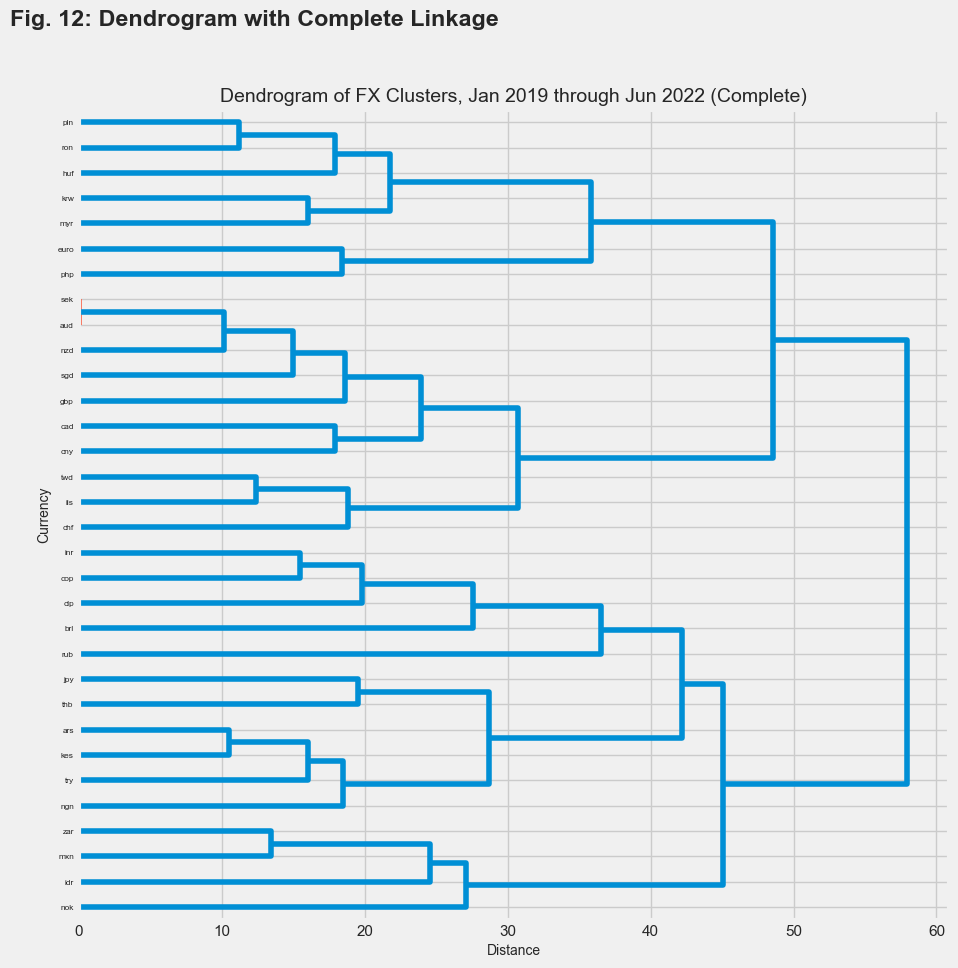

In [69]:
hier_average = linkage(subset_scaled_df.T, method="average", metric="euclidean")
hier_ward = linkage(subset_scaled_df.T, method="ward", metric="euclidean")
hier_comp = linkage(subset_scaled_df.T, method="complete", metric="euclidean")

# Change the chart style...
plt.style.use("fivethirtyeight")

df_currencies_t = df_currencies.T

plt.figure(figsize=(10, 10))
plt.title(
    "Dendrogram of FX Clusters, Jan 2019 through Jun 2022 (Complete)", fontsize=14
)
plt.xlabel("Distance", fontsize=10)
plt.ylabel("Currency", fontsize=10)
plt.suptitle(
    "Fig. 12: Dendrogram with Complete Linkage",
    fontweight="bold",
    horizontalalignment="right",
)
dendrogram(
    hier_comp,
    orientation="right",
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=df_currencies_t.index.values,
    color_threshold=3,
)
plt.yticks(fontsize=6)
plt.show()

_________________

# Lesson 3

### **1.3 Correlation**

Variables that are highly correlated with one another result in the variables' coefficients being unstable and, when used in regression, perform poorly. In machine learning, we use multicollinearity to find existence of correlation between independent variables.

The presence of multicollinearity is checked using Variance Inflation Factor (VIF) given by
$$\text{VIF} = \frac{1}{1 - R^2}$$

where $R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}} = 1 - \frac{\sum_i (y_i - \hat{y})^2}{\sum_i (y_i - \bar{y})^2}$.

The VIF will always be greater than or equal to 1 and is interpreted as follows:
1. A VIF equal to one implies that the variable is independent of the other variables.
2. A VIF between 1 and 5 means the variables are moderately correlated.
3. A VIF greater than 5 implies that the variables are highly correlated.

Therefore, for a desirable predictive model, we will want the VIF to be as close to one as possible. 

Correlation values range from -1 to +1 and the values are interpreted below:
1. Values close to +1 show a positive correlation.
2. Values close to -1 show a negative correlation.
3. Values close to 0 mean there exists no correlation between the two variables.

We can present the correlation between variables in a heatmap plot as shown below:


In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Load Iris Dataset
iris = datasets.load_iris()

# Create a Covariance Matrix
cov_data = np.corrcoef(iris.data.T)
cov_data

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

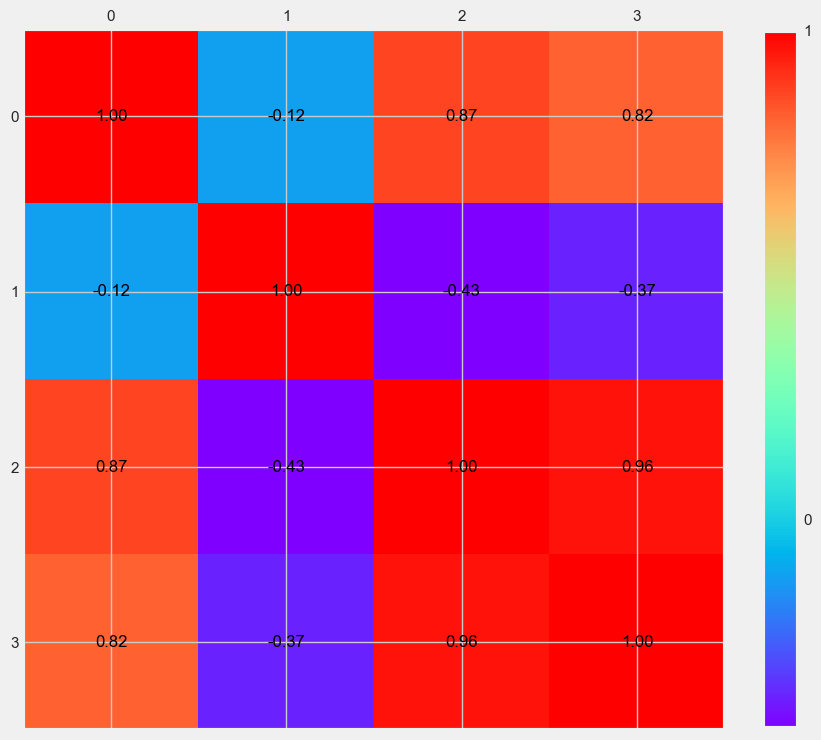

In [71]:
# Plotting the covariance matrix using a heatmap

img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(
            x,
            y,
            "%0.2f" % cov_data[x, y],
            size=12,
            color="black",
            ha="center",
            va="center",
        )

plt.show()

### **2.2 Mathematics behind PCA**

Below we review the concept of eigenspaces;

Let **A** be an $n×n$ matrix. The eigenvalues of **A**  are the solution to the characteristic equation
$$\text{determinant}(\textbf{A} - λ \textbf{I}) = |(\textbf{A} - λ \textbf{I})| = 0$$
where $\textbf{I}$ is an $n× n$ identity matrix.

If $λ$ is an eigenvalue of $\textbf{A}$, then there exists a vector $\vec{x}$ such that
$$\textbf{A} \vec{x} = λ \vec{x}$$

This vector $\vec{x}$ is referred to as the eigenvector of the matrix $\textbf{A}$ associated with the eigenvalue $λ$ and it is not unique.

Consider a $2×2$ matrix $\textbf{A}$ with eigenvectors $\vec{x_1}, \vec{x_2}$ and eigenvalues $λ_1, λ_2$. From the definition of eigenvectors, then
$$\textbf{A}\vec{x_1} = λ_1\vec{x_1}\\\textbf{A}\vec{x_2} = λ_2\vec{x_2}$$
which can be written as:
$$\textbf{A}[\vec{x_1}\hspace{3mm}\vec{x_2}] = [\vec{x_1}\hspace{3mm}\vec{x_2}]\pmatrix{λ_1 & 0\\ 0 & λ_2}$$.

Let $𝚽 = [\vec{x_1}\hspace{3mm}\vec{x_2}]$ and $Λ = \pmatrix{λ_1 & 0\\ 0 & λ_2}$. This translates to: $$\textbf{A}𝚽 = 𝚽 Λ$$

Normalizing the eigenvectors such that they are orthogonal we have;
$$𝚽 𝚽^T = 𝚽^T 𝚽 = \textbf{I}$$
which implies
$$𝚽^T \textbf{A}𝚽 = Λ$$
and
$$\textbf{A}=𝚽 Λ 𝚽^T$$.

How does this apply in the PCA process?

Let $S$ be an $m×m$ covariance (correlation) matrix, there exists an orthogonal $m\times m$ matrix, $𝚽$, such that the eigenvectors of S are the columns of $𝚽$ and the eigenvalues of $S$ are the diagonal of the matrix $Λ$ such that:
$$𝚽^T S 𝚽 = \Lambda$$
The eigenvectors of the covariance (correlation) matrix give us the direction vectors $Φ_1, Φ_2$. We can create a transformation matrix from the eigenvectors that transform our data from the $[x_1, x_2]$ axis system to the $[Φ_1, Φ_2]$ axis system using equation
$$p_{Φ} = (p_x - \mu_x)\cdot Φ$$
with $p_x$ being any point in the $[x_1, x_2]$ axis system and $\mu_x$ is the data mean.

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pca import pca

# Dataset
from sklearn.datasets import load_wine

# Load dataset
data = load_wine()
X = data.data
y = data.target
labels = data.feature_names
# Make dataframe
df = pd.DataFrame(data=X, columns=labels, index=y)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [73]:
# Initialize with normalization
model = pca(normalize=True, n_components=None)

# Fit transform with dataframe
out = model.fit_transform(df)

[pca] >n_components is set to 12
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Fig. 1: Scree Plot


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 12 Principal Components explain [99.20%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

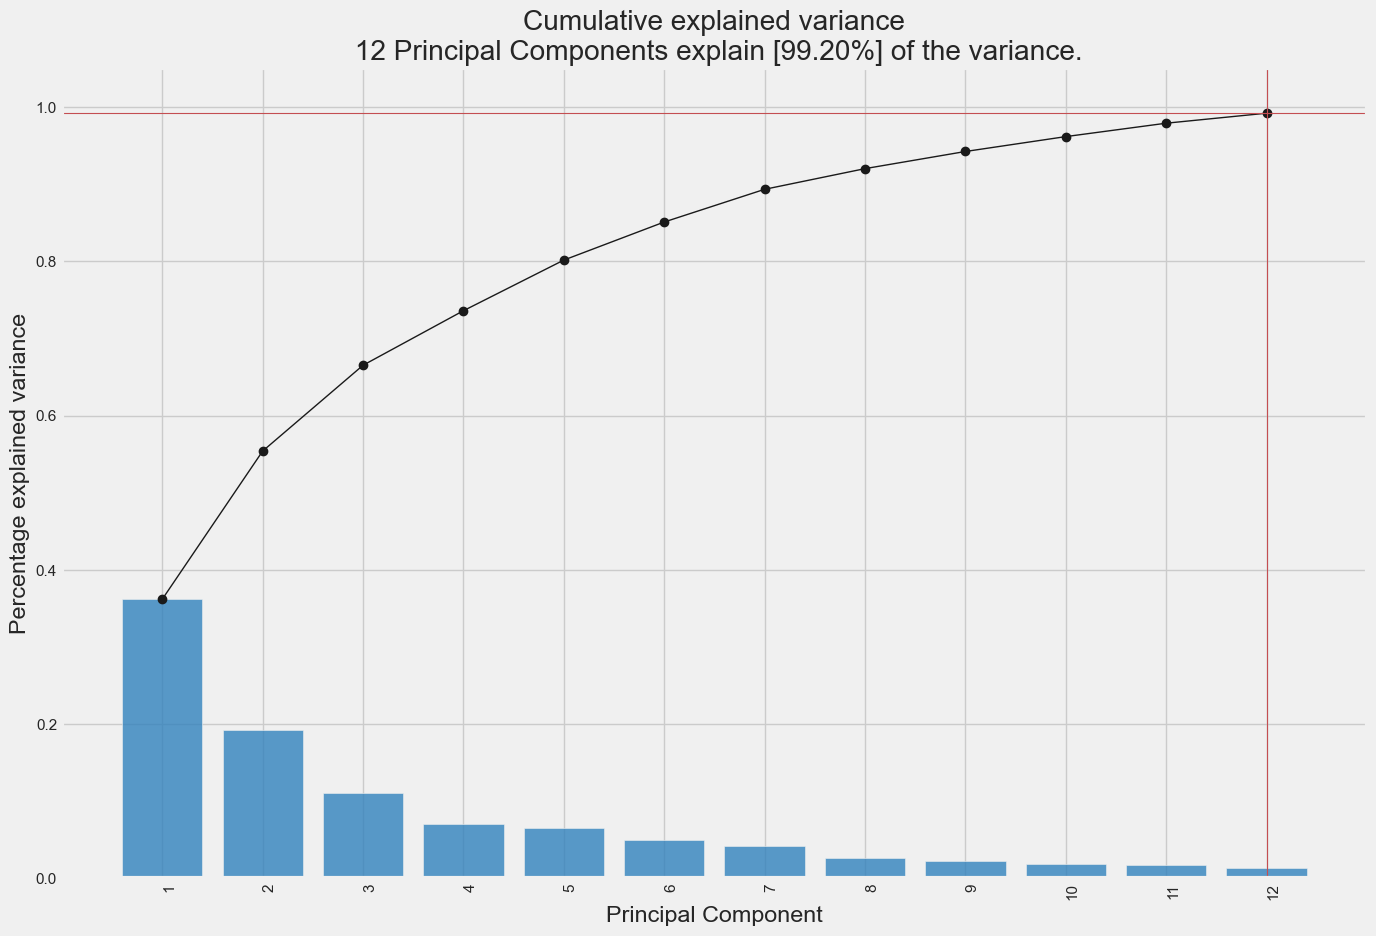

In [74]:
# Scree plot with explained variance
print("\033[1m" + "Fig. 1: Scree Plot" + "\033[0m")
model.plot()

In [75]:
# Top performing features
model.results["topfeat"]

,PC,feature,loading,type
0,PC1,flavanoids,0.422934,best
1,PC2,color_intensity,0.529996,best
2,PC3,ash,0.626224,best
3,PC4,malic_acid,0.536890,best
4,PC5,magnesium,0.727049,best
5,PC6,malic_acid,0.536814,best
6,PC7,nonflavanoid_phenols,0.595447,best
7,PC8,hue,0.436624,best
8,PC9,proline,0.575786,best
9,PC10,od280/od315_of_diluted_wines,0.523706,best


[scatterd] >INFO> Create scatterplot


Fig. 2: Scatter plot of the Scores
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


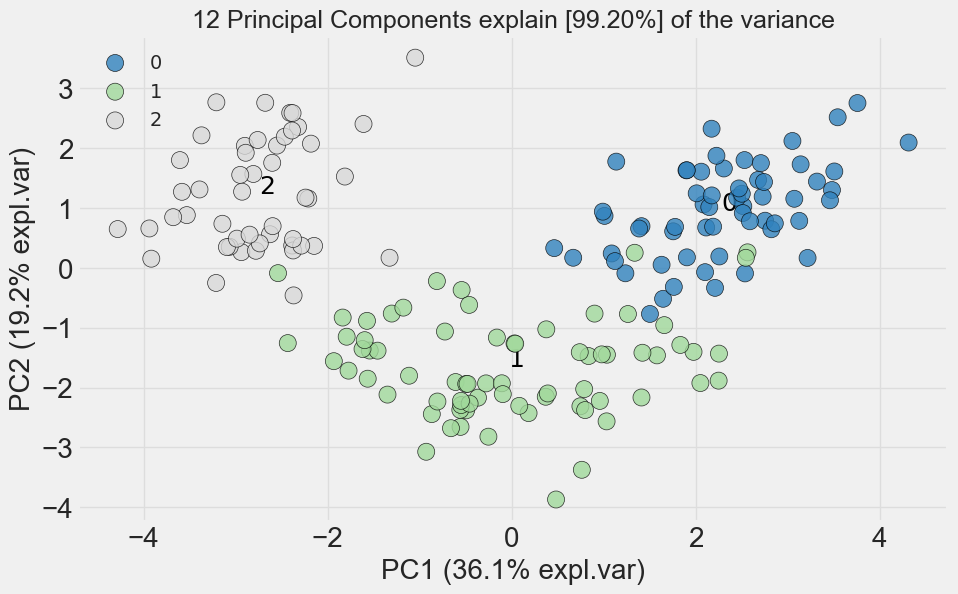

In [76]:
# Make plots

# Scatter plot
print("\033[1m" + "Fig. 2: Scatter plot of the Scores" + "\033[0m")
fig, ax = model.scatter(figsize=(10, 6))

[scatterd] >INFO> Create scatterplot


Fig. 3: Biplot without the scores
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


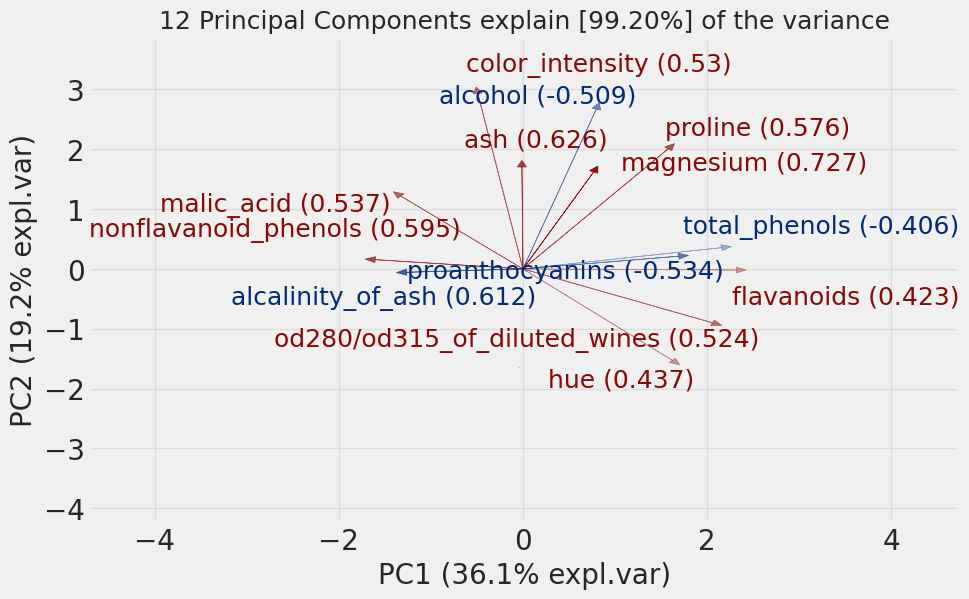

In [77]:
print("\033[1m" + "Fig. 3: Biplot without the scores" + "\033[0m")
fig, ax = model.biplot(cmap=None, label=False, legend=False, figsize=(10, 6))

# My Tries

In [226]:
def eig_decomp(Sigma):
    Phi = np.linalg.eigh(Sigma)[1][:, ::-1]
    Lambda = np.diag(np.linalg.eigh(Sigma)[0][::-1])
    # print("Phi:")
    # print(Phi)
    # print("\nLambda:")
    # print(Lambda)
    
    # print("\nPhi @ Lambda @ Phi.T:")
    # print(Phi @ Lambda @ Phi.T)
    
    return Phi, Lambda

def PCA(X, min_perc_var=0.80):
    X_st = (X - X.mean(axis=0))
    Sigma = np.cov(X_st.T)
    Phi, Lambda = eig_decomp(Sigma)
    perc_var = np.diagonal(Lambda).cumsum() / np.diagonal(Lambda).sum()
    print("perc_var:", perc_var)
    num_pc = np.where(perc_var > min_perc_var)[0][0] + 1
    print("num_pc =", num_pc)
    
    PC_matrix = Phi[:, :num_pc]
    print(PC_matrix)

In [227]:
import matplotlib.cm as cm
def plot_2d_PCA(X):
    X_st = (X - X.mean(axis=0))
    Sigma = np.cov(X_st.T)
    Phi, Lambda = eig_decomp(Sigma)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    scale = np.diagonal(Lambda) / np.diagonal(Lambda).sum()
    colors = cm.seismic(np.linspace(0, 1, Phi.shape[1]))
    for j in range(Phi.shape[1]):
        plt.quiver(*np.array([0, 0]), *Phi[:, j], angles='xy', scale_units='xy', scale=1-scale[j], color=colors[j], label=f'Vector {j+1}')
    plt.legend()

In [228]:
Mu = np.array([0.1, -0.1])
Sigma = np.array([
    [1.5, 0.5],
    [0.5, 1.5]
])
n = 1000

X = np.random.multivariate_normal(Mu, Sigma, n)

PCA(X, 0.6)

perc_var: [0.6788937 1.       ]
num_pc = 1
[[0.7010399 ]
 [0.71312205]]
